# 1 Problem Statement



The goal is to develop a predictive model that estimates individual insurance costs based on health, lifestyle, and demographic variables. This model will assist insurance companies in fairly pricing insurance policies, minimizing risk, and ensuring affordability for customers based on their risk profile.




In [1]:
from google.colab import files

# This will prompt you to select files to upload
uploaded = files.upload()


KeyboardInterrupt: 

# Data Overview

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('Data.csv')
df

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
0              5000                           3                          1   
1              5001                           0                          0   
2              5002                           1                          0   
3              5003                           7                          4   
4              5004                           3                          1   
...             ...                         ...                        ...   
24995         29995                           3                          0   
24996         29996                           6                          0   
24997         29997                           7                          0   
24998         29998                           1                          0   
24999         29999                           8                          2   

       adventure_sports Occupation  visited_doctor_last_1_year  \
0                     1    Salried                           2   
1                     0    Student                           4   
2                     0   Business                           4   
3                     0   Business                           2   
4                     0    Student                           2   
...                 ...        ...                         ...   
24995                 0    Salried                           4   
24996                 0   Business                           4   
24997                 1    Student                           2   
24998                 0    Salried                           2   
24999                 0   Business                           4   

      cholesterol_level  daily_avg_steps  age  heart_decs_history  ...  \
0            125 to 150             4866   28                   1  ...   
1            150 to 175             6411   50                   0  ...   
2            200 to 225             4509   68                   0  ...   
3            175 to 200             6214   51                   0  ...   
4            150 to 175             4938   44                   0  ...   
...                 ...              ...  ...                 ...  ...   
24995        225 to 250             5614   22                   0  ...   
24996        200 to 225             4719   58                   0  ...   
24997        150 to 175             5624   34                   0  ...   
24998        225 to 250            10777   27                   0  ...   
24999        150 to 175             5882   22                   1  ...   

        smoking_status Year_last_admitted     Location  weight  \
0              Unknown                NaN      Chennai      67   
1      formerly smoked                NaN       Jaipur      58   
2      formerly smoked                NaN       Jaipur      73   
3              Unknown                NaN      Chennai      71   
4         never smoked             2004.0    Bangalore      74   
...                ...                ...          ...     ...   
24995           smokes             2000.0       Kanpur      79   
24996     never smoked             2009.0       Kanpur      66   
24997          Unknown                NaN  Bhubaneswar      76   
24998          Unknown                NaN        Surat      74   
24999  formerly smoked             2014.0      Chennai      57   

      covered_by_any_other_company  Alcohol  exercise  \
0                                N     Rare  Moderate   
1                                N     Rare  Moderate   
2                                N    Daily   Extreme   
3                                Y     Rare        No   
4                                N       No   Extreme   
...                            ...      ...       ...   
24995                            Y     Rare  Moderate   
24996                            N     Rare  Moderate   
24997                            N     Rare  Moderate   
24998                    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [ ]:
df.describe().T

count          mean           std     min  \
applicant_id                    25000.0  17499.500000   7217.022701  5000.0   
years_of_insurance_with_us      25000.0      4.089040      2.606612     0.0   
regular_checkup_lasy_year       25000.0      0.773680      1.199449     0.0   
adventure_sports                25000.0      0.081720      0.273943     0.0   
visited_doctor_last_1_year      25000.0      3.104200      1.141663     0.0   
daily_avg_steps                 25000.0   5215.889320   1053.179748  2034.0   
age                             25000.0     44.918320     16.107492    16.0   
heart_decs_history              25000.0      0.054640      0.227281     0.0   
other_major_decs_history        25000.0      0.098160      0.297537     0.0   
avg_glucose_level               25000.0    167.530000     62.729712    57.0   
bmi                             24010.0     31.393328      7.876535    12.3   
Year_last_admitted              13119.0   2003.892217      7.581521  1990.0   
weight                          25000.0     71.610480      9.325183    52.0   
weight_change_in_last_one_year  25000.0      2.517960      1.690335     0.0   
fat_percentage                  25000.0     28.812280      8.632382    11.0   
insurance_cost                  25000.0  27147.407680  14323.691832  2468.0   

                                     25%      50%       75%      max  
applicant_id                    11249.75  17499.5  23749.25  29999.0  
years_of_insurance_with_us          2.00      4.0      6.00      8.0  
regular_checkup_lasy_year           0.00      0.0      1.00      5.0  
adventure_sports                    0.00      0.0      0.00      1.0  
visited_doctor_last_1_year          2.00      3.0      4.00     12.0  
daily_avg_steps                  4543.00   5089.0   5730.00  11255.0  
age                                31.00     45.0     59.00     74.0  
heart_decs_history                  0.00      0.0      0.00      1.0  
other_major_decs_history            0.00      0.0      0.00      1.0  
avg_glucose_level                 113.00    168.0    222.00    277.0  
bmi                                26.10     30.5     35.60    100.6  
Year_last_admitted               1997.00   2004.0   2010.00   2018.0  
weight                             64.00     72.0     78.00     96.0  
weight_change_in_last_one_year      1.00      3.0      4.00      6.0  
fat_percentage                     21.00     31.0     36.00     42.0  
insurance_cost                  16042.00  27148.0  37020.00  67870.0

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Potential issues to check:

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()/df.shape[0]*100

applicant_id                       0.000
years_of_insurance_with_us         0.000
regular_checkup_lasy_year          0.000
adventure_sports                   0.000
Occupation                         0.000
visited_doctor_last_1_year         0.000
cholesterol_level                  0.000
daily_avg_steps                    0.000
age                                0.000
heart_decs_history                 0.000
other_major_decs_history           0.000
Gender                             0.000
avg_glucose_level                  0.000
bmi                                3.960
smoking_status                     0.000
Year_last_admitted                47.524
Location                           0.000
weight                             0.000
covered_by_any_other_company       0.000
Alcohol                            0.000
exercise                           0.000
weight_change_in_last_one_year     0.000
fat_percentage                     0.000
insurance_cost                     0.000
dtype: float64

In [ ]:
df.drop('Year_last_admitted',axis=1,inplace=True)
df.drop('applicant_id',axis=1,inplace=True)

In [ ]:
# Define the renaming dictionary
rename_columns = {
    'regular_checkup_lasy_year': 'regular_checkups_last_year',
    'visited_doctor_last_1_year': 'doctor_visits_last_year',
    'heart_decs_history': 'heart_disease_history',
    'other_major_decs_history': 'other_major_disease_history',
    'daily_avg_steps': 'avg_daily_steps',
    'Year_last_admitted': 'last_admission_year',
    'covered_by_any_other_company': 'covered_by_other_company',
    'weight_change_in_last_one_year': 'weight_change_last_year'
}

# Rename the columns
df.rename(columns=rename_columns, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   years_of_insurance_with_us   25000 non-null  int64  
 1   regular_checkups_last_year   25000 non-null  int64  
 2   adventure_sports             25000 non-null  int64  
 3   Occupation                   25000 non-null  object 
 4   doctor_visits_last_year      25000 non-null  int64  
 5   cholesterol_level            25000 non-null  object 
 6   avg_daily_steps              25000 non-null  int64  
 7   age                          25000 non-null  int64  
 8   heart_disease_history        25000 non-null  int64  
 9   other_major_disease_history  25000 non-null  int64  
 10  Gender                       25000 non-null  object 
 11  avg_glucose_level            25000 non-null  int64  
 12  bmi                          24010 non-null  float64
 13  smoking_status  

### Variable Definitions

| **Variable**                         | **Business Definition**                                                                 |
|-------------------------------------|-----------------------------------------------------------------------------------------|
| `applicant_id`                      | Applicant unique ID                                                                    |
| `years_of_insurance_with_us`        | Number of years the customer has had a policy with the same company                    |
| `regular_checkup_lasy_year`         | Number of regular health checkups in the last one year                                 |
| `adventure_sports`                  | Involvement in adventure sports (e.g., climbing, diving)                               |
| `Occupation`                        | Occupation of the customer                                                             |
| `visited_doctor_last_1_year`        | Number of doctor visits in the last one year                                           |
| `cholesterol_level`                 | Customer’s cholesterol level at the time of applying for insurance                     |
| `daily_avg_steps`                   | Average daily steps taken by the customer                                              |
| `age`                               | Age of the customer                                                                    |
| `heart_decs_history`               | History of any past heart diseases                                                     |
| `other_major_decs_history`         | History of any major diseases or surgeries apart from heart-related issues             |
| `Gender`                            | Gender of the customer                                                                 |
| `avg_glucose_level`                 | Average glucose level while applying for insurance                                     |
| `bmi`                               | Body Mass Index of the customer at time of application                                 |
| `smoking_status`                    | Smoking status of the customer                                                         |
| `Year_last_admitted`               | Year the customer was last admitted to a hospital                                      |
| `Location`                          | Location of the hospital                                                               |
| `weight`                            | Weight of the customer                                                                 |
| `covered_by_any_other_company`      | Whether the customer is covered by any other insurance company                         |
| `Alcohol`                           | Alcohol consumption status of the customer                                             |
| `exercise`                          | Whether the customer exercises regularly                                               |
| `weight_change_in_last_one_year`    | Change in customer’s weight over the last one year                                     |
| `fat_percentage`                    | Body fat percentage at time of application                                             |
| `insurance_cost`                    | Total insurance cost                                                                   |


In [ ]:
df['bmi'].isnull().sum()

np.int64(990)

In [ ]:
df.shape

(25000, 22)

In [ ]:
# Convert specified columns to 'category' dtype
cat_cols = ['adventure_sports', 'heart_disease_history', 'other_major_disease_history']
df[cat_cols] = df[cat_cols].astype('category')
num_cols = [x for x in df.columns if df[x].dtype in ['float64', 'int64']]
cat_cols = [x for x in df.columns if df[x].dtype in ['object','category']]
df[cat_cols] = df[cat_cols].astype('category')
print(num_cols)
cat_cols


['years_of_insurance_with_us', 'regular_checkups_last_year', 'doctor_visits_last_year', 'avg_daily_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'weight_change_last_year', 'fat_percentage', 'insurance_cost']


['adventure_sports',
 'Occupation',
 'cholesterol_level',
 'heart_disease_history',
 'other_major_disease_history',
 'Gender',
 'smoking_status',
 'Location',
 'covered_by_other_company',
 'Alcohol',
 'exercise']

## 3 Exploratory Data Analysis

In [ ]:
for col in cat_cols:
    print(df[col].value_counts(1)*100)

adventure_sports
0    91.828
1     8.172
Name: proportion, dtype: float64
Occupation
Student     40.676
Business    40.080
Salried     19.244
Name: proportion, dtype: float64
cholesterol_level
150 to 175    35.052
125 to 150    33.356
200 to 225    11.852
175 to 200    11.524
225 to 250     8.216
Name: proportion, dtype: float64
heart_disease_history
0    94.536
1     5.464
Name: proportion, dtype: float64
other_major_disease_history
0    90.184
1     9.816
Name: proportion, dtype: float64
Gender
Male      65.688
Female    34.312
Name: proportion, dtype: float64
smoking_status
never smoked       36.996
Unknown            30.220
formerly smoked    17.316
smokes             15.468
Name: proportion, dtype: float64
Location
Bangalore      6.968
Jaipur         6.824
Bhubaneswar    6.816
Mangalore      6.788
Delhi          6.720
Ahmedabad      6.708
Guwahati       6.688
Chennai        6.676
Kanpur         6.656
Nagpur         6.652
Mumbai         6.632
Lucknow        6.548
Pune           6.4

## Outlier treatment - Winsorization

In [ ]:

for num_col in num_cols:
    df[num_col]=np.clip(df[num_col],np.percentile(df[num_col],5),np.percentile(df[num_col],95))


## KNN Imputation + Encoding

In [ ]:
num_cols

['years_of_insurance_with_us',
 'regular_checkups_last_year',
 'doctor_visits_last_year',
 'avg_daily_steps',
 'age',
 'avg_glucose_level',
 'bmi',
 'weight',
 'weight_change_last_year',
 'fat_percentage',
 'insurance_cost']

In [ ]:
target_column = 'insurance_cost'
scaling_cols = [col for col in num_cols if col != target_column]
scaling_cols

['years_of_insurance_with_us',
 'regular_checkups_last_year',
 'doctor_visits_last_year',
 'avg_daily_steps',
 'age',
 'avg_glucose_level',
 'bmi',
 'weight',
 'weight_change_last_year',
 'fat_percentage']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

# -----------------------------
# 🔧 Configuration
# -----------------------------
target_column = 'insurance_cost'

ordinal_cols = ['cholesterol_level', 'Alcohol', 'exercise']
ordinal_categories = [
    ['125 to 150', '150 to 175', '175 to 200', '200 to 225', '225 to 250'],
    ['No', 'Rare', 'Daily'],
    ['No', 'Moderate', 'Extreme']
]

nominal_cols = ['Occupation', 'Gender', 'smoking_status', 'Location', 'covered_by_other_company']
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
scaling_cols = [col for col in num_cols if col != target_column]

cols_to_impute = ['bmi']  # Numerical columns needing imputation

# -----------------------------
# 📤 Split the data
# -----------------------------
df = shuffle(df, random_state=1)

X = df.drop(columns=target_column)
y = df[target_column]

x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=1)

# -----------------------------
# 🔄 Preprocessing pipeline
# -----------------------------
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), scaling_cols),
    ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('nom', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), nominal_cols)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('imputer', KNNImputer(n_neighbors=5))
])

# -----------------------------
# ⚙️ Fit-transform train, transform val/test
# -----------------------------
x_train_processed = pipeline.fit_transform(x_train)
x_val_processed = pipeline.transform(x_val)
x_test_processed = pipeline.transform(x_test)

# -----------------------------
# ✅ Get column names after encoding
# -----------------------------
encoded_nom_cols = pipeline.named_steps['preprocess'].named_transformers_['nom'].get_feature_names_out(nominal_cols)

all_transformed_cols = (
    scaling_cols +
    ordinal_cols +
    list(encoded_nom_cols) +
    [col for col in x_train.columns if col not in (scaling_cols + ordinal_cols + nominal_cols)]
)

# -----------------------------
# 🧱 Convert arrays to DataFrames
# -----------------------------
x_train_df = pd.DataFrame(x_train_processed, columns=all_transformed_cols, index=x_train.index)
x_val_df = pd.DataFrame(x_val_processed, columns=all_transformed_cols, index=x_val.index)
x_test_df = pd.DataFrame(x_test_processed, columns=all_transformed_cols, index=x_test.index)

# -----------------------------
# 🎯 Final target arrays
# -----------------------------
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Final check
print("Train shape:", x_train_df.shape, y_train.shape)
print("Validation shape:", x_val_df.shape, y_val.shape)
print("Test shape:", x_test_df.shape, y_test.shape)




Train shape: (17500, 37) (17500,)
Validation shape: (3750, 37) (3750,)
Test shape: (3750, 37) (3750,)


In [ ]:
x_train_df

years_of_insurance_with_us  regular_checkups_last_year  \
14224                    1.108810                    2.179030   
18009                   -0.044461                   -0.686104   
13374                   -1.197733                    0.268941   
1797                     1.108810                   -0.686104   
9400                     1.108810                   -0.686104   
...                           ...                         ...   
318                     -1.582157                   -0.686104   
21892                   -0.428885                   -0.686104   
4523                     0.339962                   -0.686104   
4659                     1.108810                    0.268941   
6407                    -1.582157                   -0.686104   

       doctor_visits_last_year  avg_daily_steps       age  avg_glucose_level  \
14224                -0.070867        -0.872679 -1.265035           0.277011   
18009                 0.948167         0.634877  0.822714           1.569784   
13374                -1.089900         0.300111  0.632919           1.230431   
1797                 -1.089900        -1.245134 -1.581360           1.246591   
9400                 -0.070867        -0.249704  1.328835          -1.403594   
...                        ...              ...       ...                ...   
318                   1.967201        -0.349468  1.328835           1.569784   
21892                -1.089900         0.126077 -0.126263          -0.498653   
4523                  0.948167        -0.919236  0.063533           1.488986   
4659                 -0.070867        -1.600962  0.506388           0.438607   
6407                  1.967201        -0.224208  1.202305          -0.579451   

            bmi    weight  weight_change_last_year  fat_percentage  ...  \
14224  0.499599 -0.059528                 0.926326       -1.515691  ...   
18009 -1.085118 -0.734156                -0.919996        0.848471  ...   
13374 -0.146966  0.390224                -0.304555       -1.279275  ...   
1797  -1.300640 -1.296347                 1.541767       -1.515691  ...   
9400  -1.338673 -0.959032                 1.541767       -1.515691  ...   
...         ...       ...                      ...             ...  ...   
318    0.948391  0.390224                 1.541767        0.966679  ...   
21892  0.182656 -0.509280                -0.919996        1.084887  ...   
4523   1.970217  0.277786                 1.541767        0.966679  ...   
4659  -0.261065 -1.633661                 0.310885        0.848471  ...   
6407   0.943320 -0.846594                 0.926326        0.021014  ...   

       Location_Lucknow  Location_Mangalore  Location_Mumbai  Location_Nagpur  \
14224               0.0                 0.0              0.0              0.0   
18009               0.0                 0.0              0.0              0.0   
13374               0.0                 0.0              0.0              0.0   
1797                0.0                 0.0              0.0              0.0   
9400                0.0                 0.0              0.0              0.0   
...                 ...                 ...              ...              ...   
318                 0.0                 0.0              0.0              0.0   
21892               0.0                 0.0              0.0              0.0   
4523                0.0                 0.0              0.0              0.0   
4659                0.0                 0.0              1.0              0.0   
6407                0.0                 0.0              0.0              0.0   

       Location_Pune  Location_Surat  covered_by_other_company_Y  \
14224            0.0             0.0                         0.0   
18009            0.0             0.0                         0.0   
13374            0.0             0.0                         1.0   
1797             0.0             0.0                         0.0   
9400             0.0             0.0               

In [ ]:
df

years_of_insurance_with_us  regular_checkups_last_year  \
21492                           5                           0   
9488                            1                           1   
16933                           5                           0   
12604                           6                           3   
8222                            7                           0   
...                           ...                         ...   
10955                           0                           0   
17289                           4                           3   
5192                            8                           1   
12172                           6                           0   
235                             4                           3   

      adventure_sports Occupation  doctor_visits_last_year cholesterol_level  \
21492                0    Student                        2        125 to 150   
9488                 0    Student                        4        150 to 175   
16933                0   Business                        3        175 to 200   
12604                0   Business                        3        175 to 200   
8222                 0    Student                        3        150 to 175   
...                ...        ...                      ...               ...   
10955                0   Business                        2        150 to 175   
17289                0   Business                        2        175 to 200   
5192                 0   Business                        2        175 to 200   
12172                0   Business                        2        175 to 200   
235                  0   Business                        4        150 to 175   

       avg_daily_steps  age heart_disease_history other_major_disease_history  \
21492           3746.0   32                     0                           0   
9488            5119.0   26                     0                           0   
16933           4649.0   60                     0                           0   
12604           5837.0   55                     0                           0   
8222            4453.0   37                     0                           0   
...                ...  ...                   ...                         ...   
10955           5703.0   25                     0                           0   
17289           5355.0   56                     0                           0   
5192            4427.0   69                     0                           0   
12172           3746.0   59                     0                           0   
235             6168.0   69                     0                           0   

       ...   bmi   smoking_status   Location weight covered_by_other_company  \
21492  ...  35.6          Unknown     Kanpur     80                        Y   
9488   ...  34.9           smokes     Kanpur     61                        N   
16933  ...  29.1  formerly smoked    Kolkata     58                        Y   
12604  ...  26.8  formerly smoked    Lucknow     70                        Y   
8222   ...  28.0  formerly smoked  Mangalore     78                        Y   
...    ...   ...              ...        ...    ...                      ...   
10955  ...  23.1     never smoked       Pune     64                        N   
17289  ...  35.2     never smoked    Kolkata     74                        Y   
5192   ...  29.7     never smoked  Bangalore     62                        N   
12172  ...  24.3     never smoked       Pune     77                        Y   
235    ...  30.9     never smoked   Guwahati     75                        Y   

       Alcohol  exercise weight_change_last_year fat_percentage  \
21492    Daily  Moderate                       1             33   
9488        No   Extreme                       5             35   
16933       No  Moderate                       3             29   
12604       No  Moderate                       2             29

## ML Model Building

Cross-validation performance:

Bagging           : RMSE = 3124.0120, MAPE = 11.91%, Time = 34.96 sec
Random Forest     : RMSE = 2997.4793, MAPE = 11.53%, Time = 349.78 sec
GBM               : RMSE = 2893.4793, MAPE = 11.26%, Time = 83.52 sec
AdaBoost          : RMSE = 3198.6733, MAPE = 14.91%, Time = 21.39 sec
XGBoost           : RMSE = 3055.7558, MAPE = 11.93%, Time = 9.81 sec
Decision Tree     : RMSE = 4162.4225, MAPE = 15.22%, Time = 6.12 sec
Extra Trees       : RMSE = 3139.9476, MAPE = 11.89%, Time = 306.46 sec
Ridge             : RMSE = 3056.1842, MAPE = 13.24%, Time = 0.36 sec
LassoCV           : RMSE = 3054.0848, MAPE = 13.20%, Time = 8.59 sec
Linear Regression : RMSE = 3056.1888, MAPE = 13.24%, Time = 0.82 sec
SVR               : RMSE = 13395.3130, MAPE = 73.98%, Time = 436.15 sec
KNN               : RMSE = 6049.3439, MAPE = 26.39%, Time = 5.07 sec
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001707 seconds.
You can set `force_row_wise

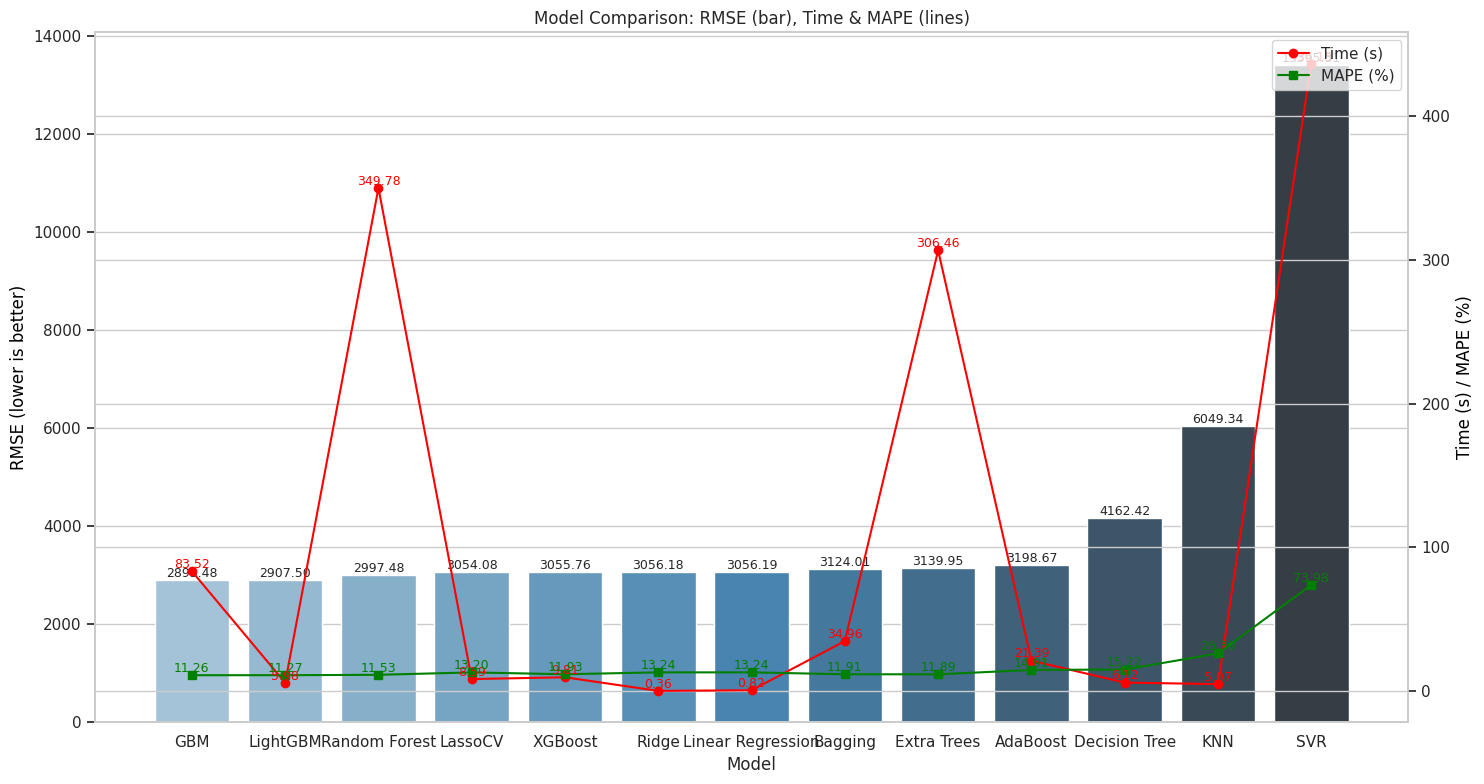

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import (BaggingRegressor, RandomForestRegressor,
                              GradientBoostingRegressor, AdaBoostRegressor,
                              ExtraTreesRegressor)
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_percentage_error, mean_squared_error

# === Define models ===
models = [
    ("Bagging", BaggingRegressor(random_state=1)),
    ("Random Forest", RandomForestRegressor(random_state=1)),
    ("GBM", GradientBoostingRegressor(random_state=1)),
    ("AdaBoost", AdaBoostRegressor(random_state=1)),
    ("XGBoost", XGBRegressor(random_state=1, eval_metric='rmse')),
    ("Decision Tree", DecisionTreeRegressor(random_state=1)),
    ("Extra Trees", ExtraTreesRegressor(random_state=1)),
    ("Ridge", Ridge(random_state=1)),
    ("LassoCV", LassoCV(cv=5, random_state=1, max_iter=10000)),
    ("Linear Regression", LinearRegression()),
    ("SVR", SVR()),
    ("KNN", KNeighborsRegressor()),
    ("LightGBM", LGBMRegressor(random_state=1))
]

# # === Models needing scaling ===
# models_needing_scaling = {'Ridge', 'LassoCV', 'Linear Regression', 'SVR', 'KNN'}

# # === Scale once ===
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)

# === Store results ===
results_rmse = []
results_mape = []
names = []
times = []
params_list = []


print("Cross-validation performance:\n")

# === Cross-validation and timing ===
for name, model in models:
    start_time = time.time()
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    # X_input = x_train_scaled if name in models_needing_scaling else x_train

    # RMSE
    rmse_scores = cross_val_score(model,x_train_processed, y_train,
                                   cv=kfold, scoring='neg_root_mean_squared_error')

    # MAPE
    mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
    mape_scores = cross_val_score(model, x_train_processed, y_train,
                                   cv=kfold, scoring=mape_scorer)
     # Fit the model once to extract fitted hyperparameters
    model.fit(x_train_processed, y_train)               # ⬅️ ADD HERE
    params_list.append(model.get_params())
    end_time = time.time()

    results_rmse.append(-rmse_scores.mean())
    results_mape.append(-mape_scores.mean() * 100)  # convert to %
    times.append(end_time - start_time)
    names.append(name)

    print(f"{name:<18}: RMSE = {-rmse_scores.mean():.4f}, MAPE = {-mape_scores.mean() * 100:.2f}%, Time = {end_time - start_time:.2f} sec")

# === Prepare DataFrame ===
df_results = pd.DataFrame({
    'Model': names,
    'RMSE': results_rmse,
    'MAPE': results_mape,
    'Time': times,
    'Fitted Parameters': params_list
}).sort_values(by='RMSE', ascending=True).reset_index(drop=True)

# === Plotting ===
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

# Barplot for RMSE
ax1 = sns.barplot(x='Model', y='RMSE', data=df_results, palette='Blues_d')
ax1.set_ylabel("RMSE (lower is better)", color='black')
ax1.set_xlabel("Model")

# Secondary axis for Time and MAPE
ax2 = ax1.twinx()
ax2.plot(df_results['Model'], df_results['Time'], color='red', marker='o', label='Time (s)')
ax2.plot(df_results['Model'], df_results['MAPE'], color='green', marker='s', label='MAPE (%)')
ax2.set_ylabel("Time (s) / MAPE (%)", color='black')
ax2.tick_params(axis='y')

# Add value labels to RMSE bars
for i, bar in enumerate(ax1.patches):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{height:.2f}',
             ha='center', va='bottom', fontsize=9)

# Add value labels to Time and MAPE points
for i, (t, m) in enumerate(zip(df_results['Time'], df_results['MAPE'])):
    ax2.text(i, t + 0.1, f'{t:.2f}', color='red', ha='center', va='bottom', fontsize=9)
    ax2.text(i, m + 0.1, f'{m:.2f}', color='green', ha='center', va='bottom', fontsize=9)

# Final touches
plt.title("Model Comparison: RMSE (bar), Time & MAPE (lines)")
plt.xticks(rotation=45)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.savefig("Model_Comparison_RMSE_MAPE_Time.jpg", dpi=300)
plt.show()


# LGBM Model

In [ ]:
import time
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, make_scorer

# --- Define RMSE scorer ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Evaluation Function ---
def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })

# --- Define LGBM Model ---
lgbm = LGBMRegressor(random_state=1, n_jobs=-1)

# --- Hyperparameter grid ---
param_grid = {
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40, 60, 80],
    'max_depth': [-1, 3, 5, 7, 10],
    'min_child_samples': [5, 10, 20, 30, 50],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}


# --- Randomized Search Setup ---
search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=200,  # Increase if time permits
    scoring=rmse_scorer,
    cv=5,
    random_state=1,
    verbose=1,
    n_jobs=-1
)

# --- Fit and Time ---
start_time = time.time()
search.fit(x_train_processed, y_train)
print(f"\nRandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# --- Best Parameters and Score ---
print("Best Parameters:", search.best_params_)
print("Best Cross-Validation RMSE:", -search.best_score_)

# --- Retrain Best Estimator ---
best_lgbm = search.best_estimator_
best_lgbm.fit(x_train_processed, y_train)

# --- Evaluate on Train and Validation ---
print("\nTraining Performance:")
train_perf_lgbm = regression_performance_evaluation(best_lgbm, x_train_processed, y_train)
print(train_perf_lgbm)

print("\nValidation Performance:")
val_perf_lgbm = regression_performance_evaluation(best_lgbm, x_val_processed, y_val)
print(val_perf_lgbm)

# --- Overfitting Check ---
rmse_gap = val_perf_lgbm["RMSE"][0] - train_perf_lgbm["RMSE"][0]
print(f"\nRMSE Gap (Val - Train): {rmse_gap:.4f} → {'Overfitting' if rmse_gap > 500 else 'Acceptable'}")


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 37
[LightGBM] [Info] Start training from score 26823.070171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

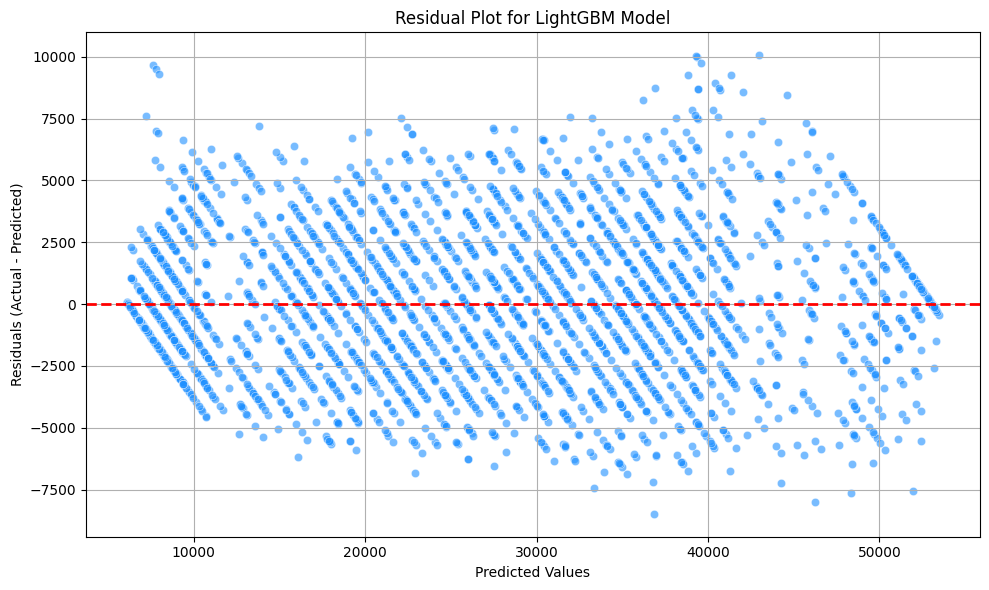

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Predict on validation set ---
y_pred = best_lgbm.predict(x_val_processed)

# --- Compute residuals ---
residuals = y_val - y_pred

# --- Residual Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='dodgerblue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for LightGBM Model')
plt.grid(True)
plt.tight_layout()
plt.savefig("Residual_Plot_LightGBM.jpg", dpi=300)
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif['Features'] = predictors.columns
    vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif
checking_vif(x_train_df)

Features   VIF
15                     Gender_Male  3.51
12                        exercise  3.19
10               cholesterol_level  2.56
14              Occupation_Student  2.45
11                         Alcohol  2.43
17     smoking_status_never smoked  2.37
16  smoking_status_formerly smoked  1.73
18           smoking_status_smokes  1.60
13              Occupation_Salried  1.59
33      covered_by_other_company_Y  1.53
19              Location_Bangalore  1.50
23               Location_Guwahati  1.47
20            Location_Bhubaneswar  1.47
24                 Location_Jaipur  1.47
28              Location_Mangalore  1.47
29                 Location_Mumbai  1.47
21                Location_Chennai  1.46
22                  Location_Delhi  1.46
25                 Location_Kanpur  1.45
31                   Location_Pune  1.44
32                  Location_Surat  1.44
30                 Location_Nagpur  1.44
27                Location_Lucknow  1.44
26                Location_Kolkata  1.43
7                           weight  1.17
36     other_major_disease_history  1.17
6                              bmi  1.15
8          weight_change_last_year  1.14
9                   fat_percentage  1.10
35           heart_disease_history  1.09
34                adventure_sports  1.09
0       years_of_insurance_with_us  1.08
1       regular_checkups_last_year  1.05
3                  avg_daily_steps  1.05
2          doctor_visits_last_year  1.04
4                              age  1.00
5                avg_glucose_level  1.00

In [ ]:
num_cols

['years_of_insurance_with_us',
 'regular_checkups_last_year',
 'doctor_visits_last_year',
 'avg_daily_steps',
 'age',
 'avg_glucose_level',
 'bmi',
 'weight',
 'weight_change_last_year',
 'fat_percentage',
 'insurance_cost']

In [ ]:
from sklearn.feature_selection import RFECV
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold

model = LGBMRegressor(random_state=1)

rfecv = RFECV(
    estimator=model,
    step=1,
    cv=KFold(n_splits=5),
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

rfecv.fit(x_train_df, y_train)

# Optimal number of features
print("Optimal number of features:", rfecv.n_features_)

# Selected features
selected_features = x_train_df.columns[rfecv.support_]
print("Selected Features:\n", selected_features)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 37
[LightGBM] [Info] Start training from score 26823.070171
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 36
[LightGBM] [Info] Start training from score 26823.070171
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] To

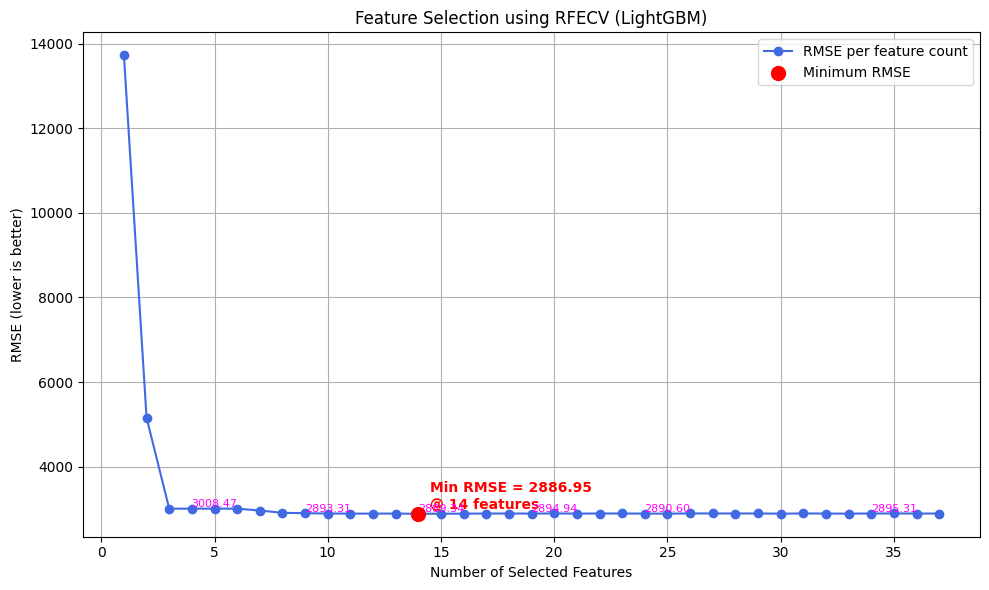

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get number of features and RMSE values
n_features = np.arange(1, len(rfecv.cv_results_['mean_test_score']) + 1)
rmse_scores = -rfecv.cv_results_['mean_test_score']  # convert from negative RMSE

# Find the index and value of the minimum RMSE
min_rmse_idx = np.argmin(rmse_scores)
min_rmse = rmse_scores[min_rmse_idx]
best_feature_count = n_features[min_rmse_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_features, rmse_scores, marker='o', color='royalblue', label='RMSE per feature count')

# Annotate the best point
plt.scatter(best_feature_count, min_rmse, color='red', s=100, zorder=5, label='Minimum RMSE')
plt.text(best_feature_count + 0.5, min_rmse + 50,
         f'Min RMSE = {min_rmse:.2f}\n@ {best_feature_count} features',
         color='red', fontsize=10, ha='left', va='bottom', fontweight='bold')
# Label RMSE values at specific feature counts
for i in [5, 10, 15, 20, 25, 35]:
    if i <= len(rmse_scores):
        plt.text(i, rmse_scores[i-1] + 30,
                 f"{rmse_scores[i-1]:.2f}",
                 color='magenta', fontsize=8, ha='center')


# Labels and title
plt.xlabel("Number of Selected Features")
plt.ylabel("RMSE (lower is better)")
plt.title("Feature Selection using RFECV (LightGBM)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save and show
plt.savefig("Feature_Selection_Plot_LightGBM.jpg", dpi=300)
plt.show()


# LGBM TOP 14 optimal features

Optimal number of features: 14
Selected Features:
 ['years_of_insurance_with_us', 'regular_checkups_last_year', 'doctor_visits_last_year', 'avg_daily_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'weight_change_last_year', 'fat_percentage', 'cholesterol_level', 'Alcohol', 'exercise', 'covered_by_other_company_Y']
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 14
[LightGBM] [Info] Start training from score 26823.070171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

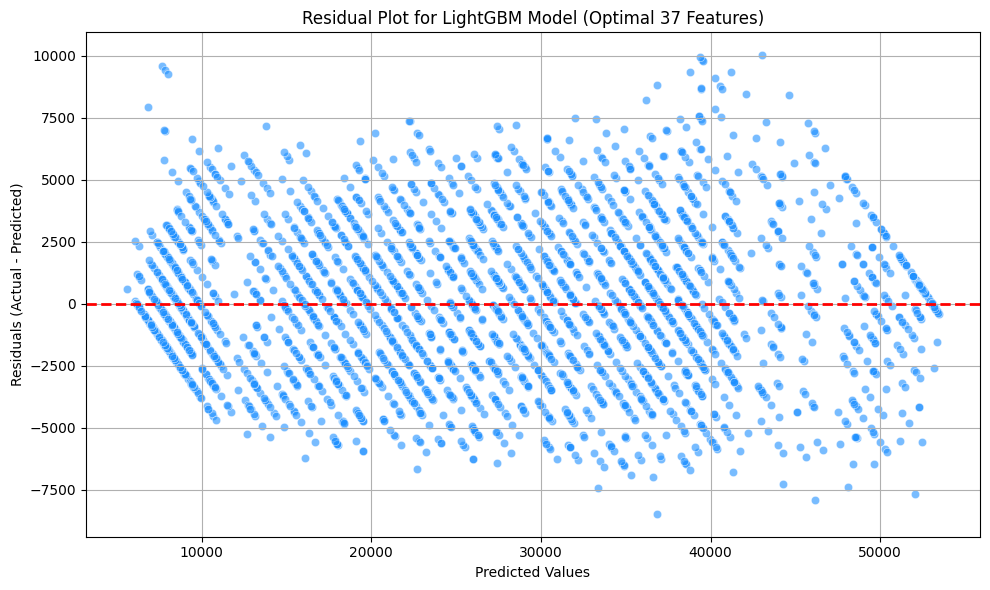

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    mean_squared_error, r2_score,
    mean_absolute_percentage_error, make_scorer
)

# --- Define RMSE scorer ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Evaluation Function ---
def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })

# -----------------------------
# ✅ Train LGBM on 14 Optimal Features
# -----------------------------
optimal_features = x_train_df.columns[rfecv.support_]
print("Optimal number of features:", len(optimal_features))
print("Selected Features:\n", optimal_features.tolist())

x_train_opt = x_train_df[optimal_features]
x_val_opt = x_val_df[optimal_features]

# --- Define LGBM Model ---
lgbm_opt = LGBMRegressor(random_state=1, n_jobs=-1)

# --- Hyperparameter grid ---
param_grid = {
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40, 60, 80],
    'max_depth': [-1, 3, 5, 7, 10],
    'min_child_samples': [5, 10, 20, 30, 50],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# --- Randomized Search ---
search = RandomizedSearchCV(
    estimator=lgbm_opt,
    param_distributions=param_grid,
    n_iter=200,
    scoring=rmse_scorer,
    cv=5,
    random_state=1,
    verbose=1,
    n_jobs=-1
)

# --- Fit and Time ---
start_time = time.time()
search.fit(x_train_opt, y_train)
print(f"\nRandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# --- Best Parameters and Score ---
print("Best Parameters:", search.best_params_)
print("Best Cross-Validation RMSE:", -search.best_score_)

# --- Retrain Best Estimator ---
best_lgbm_opt = search.best_estimator_
best_lgbm_opt.fit(x_train_opt, y_train)

# --- Evaluate on Train and Validation ---
print("\nTraining Performance:")
train_perf_lgbm_opt = regression_performance_evaluation(best_lgbm_opt, x_train_opt, y_train)
print(train_perf_lgbm_opt)

print("\nValidation Performance:")
val_perf_lgbm_opt = regression_performance_evaluation(best_lgbm_opt, x_val_opt, y_val)
print(val_perf_lgbm_opt)

# --- Overfitting Check ---
rmse_gap_opt = val_perf_lgbm_opt["RMSE"][0] - train_perf_lgbm_opt["RMSE"][0]
print(f"\nRMSE Gap (Val - Train): {rmse_gap_opt:.4f} → {'Overfitting' if rmse_gap_opt > 500 else 'Acceptable'}")

# --- Residual Plot ---
y_pred_opt = best_lgbm_opt.predict(x_val_opt)
residuals_opt = y_val - y_pred_opt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_opt, y=residuals_opt, color='dodgerblue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for LightGBM Model (Optimal 37 Features)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Residual_Plot_LightGBM_Optimal_37_Features.jpg", dpi=300)
plt.show()


In [ ]:
# --- Evaluate on Train and Validation ---
print("\nTraining Performance:")
train_perf_lgbm_opt = regression_performance_evaluation(best_lgbm_opt, x_train_opt, y_train)
print(train_perf_lgbm_opt)

print("\nValidation Performance:")
val_perf_lgbm_opt = regression_performance_evaluation(best_lgbm_opt, x_val_opt, y_val)
print(val_perf_lgbm_opt)


Training Performance:
    MAPE (%)         RMSE        R²  Adjusted R²
0  11.045422  2838.998543  0.956598     0.956563

Validation Performance:
   MAPE (%)         RMSE        R²  Adjusted R²
0  11.29794  2922.493884  0.954878     0.954709


# LGBM TOP10

Top 10 Features:
 ['years_of_insurance_with_us', 'regular_checkups_last_year', 'doctor_visits_last_year', 'avg_daily_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'weight_change_last_year', 'fat_percentage']
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 10
[LightGBM] [Info] Start training from score 26823.070171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

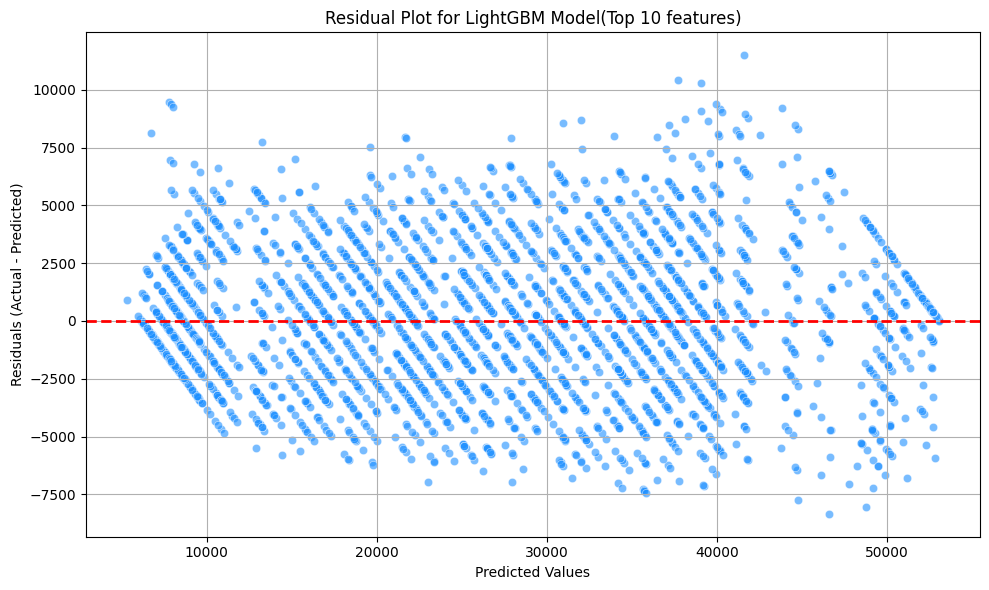

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# -----------------------------
# 🔟 Get top 10 ranked features
# -----------------------------
top_10_indices = np.argsort(rfecv.ranking_)[:10]
top_10_features = x_train_df.columns[top_10_indices]
print("Top 10 Features:\n", top_10_features.tolist())

import time
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, make_scorer

# --- Define RMSE scorer ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Evaluation Function ---
def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })

# -----------------------------
# 📦 Train LGBM on top 10 features
# -----------------------------
x_train_top10 = x_train_df[top_10_features]
x_val_top10 = x_val_df[top_10_features]

# --- Define LGBM Model ---
lgbm_top10 = LGBMRegressor(random_state=1, n_jobs=-1)

# --- Hyperparameter grid ---
param_grid = {
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40, 60, 80],
    'max_depth': [-1, 3, 5, 7, 10],
    'min_child_samples': [5, 10, 20, 30, 50],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}


# --- Randomized Search Setup ---
search = RandomizedSearchCV(
    estimator=lgbm_top10,
    param_distributions=param_grid,
    n_iter=200,  # Increase if time permits
    scoring=rmse_scorer,
    cv=5,
    random_state=1,
    verbose=1,
    n_jobs=-1
)

# --- Fit and Time ---
start_time = time.time()
search.fit(x_train_top10, y_train)
print(f"\nRandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# --- Best Parameters and Score ---
print("Best Parameters:", search.best_params_)
print("Best Cross-Validation RMSE:", -search.best_score_)

# --- Retrain Best Estimator ---
best_lgbm = search.best_estimator_
best_lgbm.fit(x_train_top10, y_train)

# --- Evaluate on Train and Validation ---
print("\nTraining Performance:")
train_perf_lgbm_top10 = regression_performance_evaluation(best_lgbm, x_train_top10, y_train)
print(train_perf_lgbm_top10)

print("\nValidation Performance:")
val_perf_lgbm_top10 = regression_performance_evaluation(best_lgbm, x_val_top10, y_val)
print(val_perf_lgbm_top10)

# --- Overfitting Check ---
rmse_gap = val_perf_lgbm_top10["RMSE"][0] - train_perf_lgbm_top10["RMSE"][0]

print(f"\nRMSE Gap (Val - Train): {rmse_gap:.4f} → {'Overfitting' if rmse_gap > 500 else 'Acceptable'}")

import matplotlib.pyplot as plt
import seaborn as sns

# --- Predict on validation set ---
y_pred = best_lgbm.predict(x_val_top10)

# --- Compute residuals ---
residuals = y_val - y_pred

# --- Residual Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='dodgerblue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for LightGBM Model(Top 10 features)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Residual_Plot_LightGBM(Top 10 features).jpg", dpi=300)
plt.show()




In [ ]:
def run_lgbm_for_top_k_features(k, rfecv, x_train_df, y_train, x_val_df, y_val):
    top_k_indices = np.argsort(rfecv.ranking_)[:k]
    top_k_features = x_train_df.columns[top_k_indices]

    x_train_k = x_train_df[top_k_features]
    x_val_k = x_val_df[top_k_features]

    model = LGBMRegressor(random_state=1, n_jobs=-1)

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=200,
        scoring=rmse_scorer,
        cv=5,
        random_state=1,
        verbose=0,
        n_jobs=-1
    )

    search.fit(x_train_k, y_train)
    best_model = search.best_estimator_
    best_model.fit(x_train_k, y_train)

    print(f"\n🔢 Top {k} Features")
    print("Best Parameters:", search.best_params_)
    print("Best CV RMSE:", -search.best_score_)

    train_perf_k = regression_performance_evaluation(best_model, x_train_k, y_train)
    val_perf_k = regression_performance_evaluation(best_model, x_val_k, y_val)

    print("\n📊 Training Performance:\n", train_perf_k)
    print("\n📊 Validation Performance:\n", val_perf_k)

    rmse_gap = val_perf_k["RMSE"][0] - train_perf_k["RMSE"][0]
    print(f"\nRMSE Gap: {rmse_gap:.4f} → {'Overfitting' if rmse_gap > 500 else 'Acceptable'}")

    y_pred = best_model.predict(x_val_k)
    residuals = y_val - y_pred

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, color='dodgerblue', alpha=0.6)
    plt.axhline(0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.title(f'Residual Plot for LightGBM (Top {k} Features)')
    plt.tight_layout()
    plt.savefig(f"Residual_Plot_LightGBM_Top_{k}_Features.jpg", dpi=300)
    plt.show()

    return top_k_features.tolist()


In [ ]:
top_15_features = run_lgbm_for_top_k_features(15, rfecv, x_train_df, y_train, x_val_df, y_val)
top_20_features = run_lgbm_for_top_k_features(20, rfecv, x_train_df, y_train, x_val_df, y_val)


KeyboardInterrupt: 

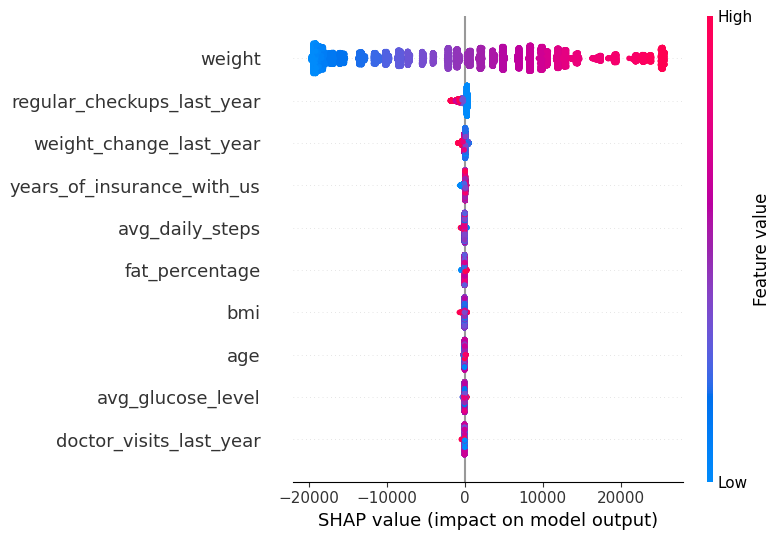

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
explainer = shap.TreeExplainer(best_lgbm)
shap_values = explainer.shap_values(x_train_df[top_10_features])
shap.summary_plot(shap_values, x_train_df[top_10_features])
plt.savefig("SHAP_Summary_Plot_LightGBM_Top_10_Features.jpg", dpi=300)


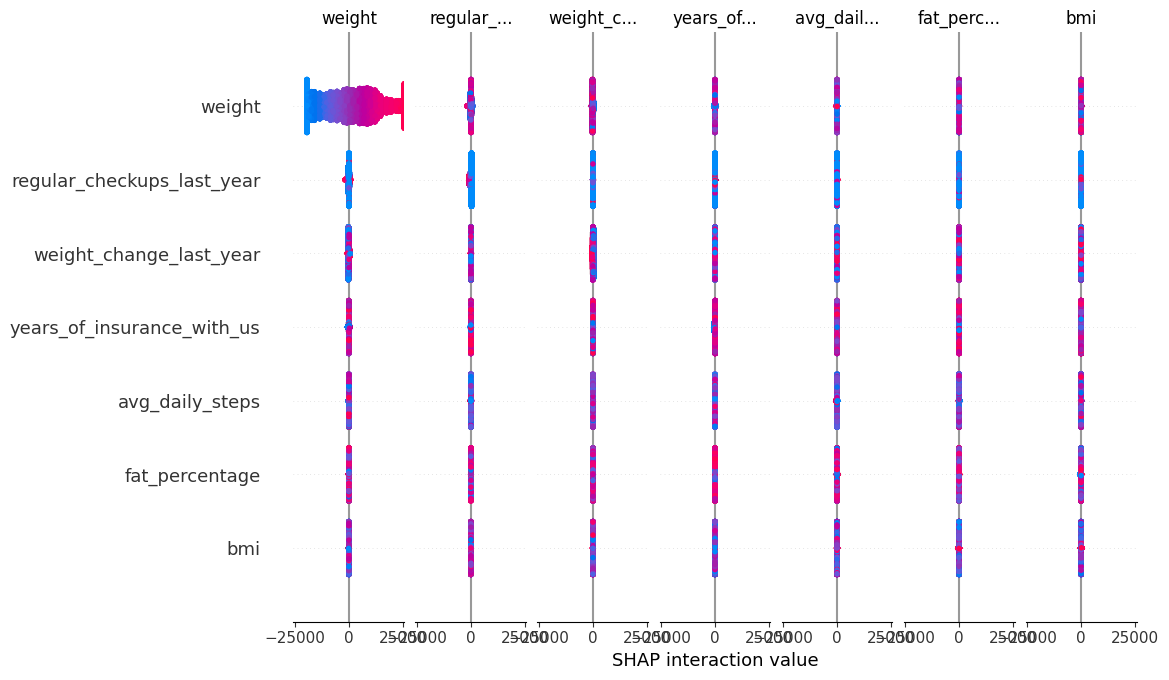

<Figure size 640x480 with 0 Axes>

In [ ]:


shap_interact = explainer.shap_interaction_values(x_train_df[top_10_features])
shap.summary_plot(shap_interact, x_train_df[top_10_features])
plt.savefig("SHAP_Interaction_Plot_LightGBM_Top_10_Features.jpg", dpi=300)



# Feature Engineering: Interaction & Nonlinear Terms

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1247
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 15
[LightGBM] [Info] Start training from score 26823.070171
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 14
[LightGBM] [Info] Start training from score 26823.070171
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] 

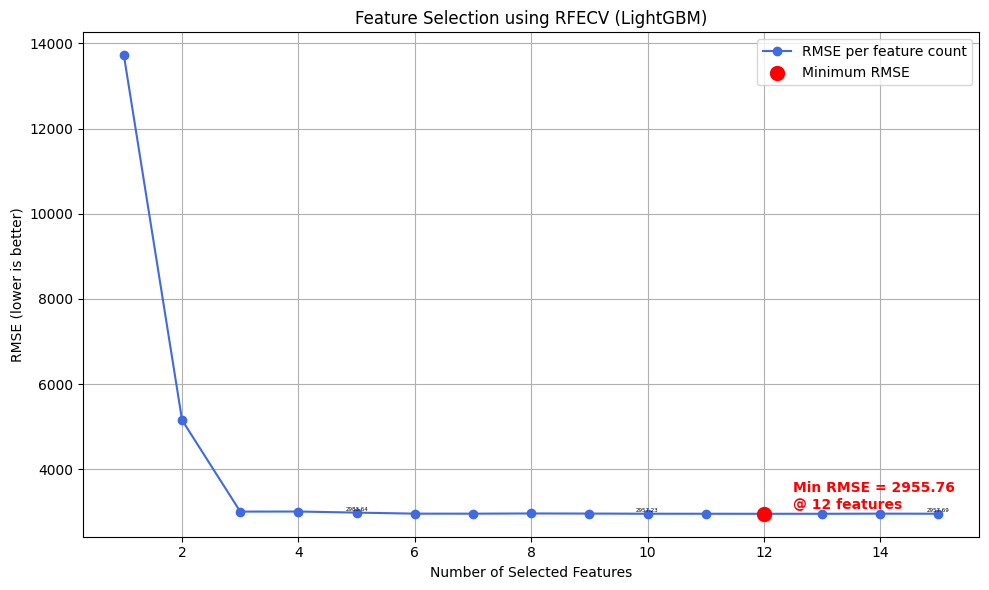

In [ ]:
import numpy as np
import pandas as pd

# -----------------------------------------------
# ✅ Create Copies of Original DataFrames
# -----------------------------------------------
x_train_df_with_intern = x_train_df[top_10_features].copy()
x_val_df_with_intern = x_val_df[top_10_features].copy()
x_test_df_with_intern = x_test_df[top_10_features].copy()

# ------------------------------------------------
# ✅ Feature Engineering: Interaction & Nonlinear Terms
# ------------------------------------------------

# ➤ Interaction: checkups × weight_change
x_train_df_with_intern['checkup_weight_interaction'] = (
    x_train_df_with_intern['regular_checkups_last_year'] * x_train_df_with_intern['weight_change_last_year']
)
x_val_df_with_intern['checkup_weight_interaction'] = (
    x_val_df_with_intern['regular_checkups_last_year'] * x_val_df_with_intern['weight_change_last_year']
)
x_test_df_with_intern['checkup_weight_interaction'] = (
    x_test_df_with_intern['regular_checkups_last_year'] * x_test_df_with_intern['weight_change_last_year']
)

# ➤ Log transformation of weight
x_train_df_with_intern['log_weight'] = np.log1p(x_train_df_with_intern['weight'])
x_val_df_with_intern['log_weight'] = np.log1p(x_val_df_with_intern['weight'])
x_test_df_with_intern['log_weight'] = np.log1p(x_test_df_with_intern['weight'])

# ➤ Square of weight
x_train_df_with_intern['weight_squared'] = x_train_df_with_intern['weight'] ** 2
x_val_df_with_intern['weight_squared'] = x_val_df_with_intern['weight'] ** 2
x_test_df_with_intern['weight_squared'] = x_test_df_with_intern['weight'] ** 2

# ➤ weight × checkups
x_train_df_with_intern['weight_x_checkups'] = (
    x_train_df_with_intern['weight'] * x_train_df_with_intern['regular_checkups_last_year']
)
x_val_df_with_intern['weight_x_checkups'] = (
    x_val_df_with_intern['weight'] * x_val_df_with_intern['regular_checkups_last_year']
)
x_test_df_with_intern['weight_x_checkups'] = (
    x_test_df_with_intern['weight'] * x_test_df_with_intern['regular_checkups_last_year']
)

# ➤ weight × weight_change
x_train_df_with_intern['weight_x_weight_change'] = (
    x_train_df_with_intern['weight'] * x_train_df_with_intern['weight_change_last_year']
)
x_val_df_with_intern['weight_x_weight_change'] = (
    x_val_df_with_intern['weight'] * x_val_df_with_intern['weight_change_last_year']
)
x_test_df_with_intern['weight_x_weight_change'] = (
    x_test_df_with_intern['weight'] * x_test_df_with_intern['weight_change_last_year']
)

from sklearn.feature_selection import RFECV
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------------
# Step 1: Define Model and RFECV
# -----------------------------------
model = LGBMRegressor(random_state=1)

rfecv = RFECV(
    estimator=model,
    step=1,
    cv=KFold(n_splits=5),
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# -----------------------------------
# Step 2: Fit RFECV on Training Data
# -----------------------------------
rfecv.fit(x_train_df_with_intern, y_train)

# -----------------------------------
# Step 3: Extract Optimal Features
# -----------------------------------
print("✅ Optimal number of features:", rfecv.n_features_)

selected_features = x_train_df_with_intern.columns[rfecv.support_]
print("✅ Selected Features:\n", selected_features.tolist())

# -----------------------------------
# Step 4: RMSE Scores vs Feature Count Plot
# -----------------------------------
# Get number of features and RMSE values
n_features = np.arange(1, len(rfecv.cv_results_['mean_test_score']) + 1)
rmse_scores = -rfecv.cv_results_['mean_test_score']  # convert from negative RMSE

# Identify the best (minimum RMSE)
min_rmse_idx = np.argmin(rmse_scores)
min_rmse = rmse_scores[min_rmse_idx]
best_feature_count = n_features[min_rmse_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_features, rmse_scores, marker='o', color='royalblue', label='RMSE per feature count')

# Annotate best point
plt.scatter(best_feature_count, min_rmse, color='red', s=100, zorder=5, label='Minimum RMSE')
plt.text(best_feature_count + 0.5, min_rmse + 50,
         f'Min RMSE = {min_rmse:.2f}\n@ {best_feature_count} features',
         color='red', fontsize=10, ha='left', va='bottom', fontweight='bold')

# Label specific points for reference
for i in [5, 10, 15, 20, 25, 35,40,45]:
    if i <= len(rmse_scores):
        plt.text(i, rmse_scores[i - 1] + 30,
                 f"{rmse_scores[i - 1]:.2f}",
                 color='black', fontsize=4, ha='center')

# Final touches
plt.xlabel("Number of Selected Features")
plt.ylabel("RMSE (lower is better)")
plt.title("Feature Selection using RFECV (LightGBM)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save and show
plt.savefig("Feature_Selection_Plot_LightGBM_intern.jpg", dpi=300)
plt.show()

# -----------------------------------
# Step 5: Create Reduced Feature Datasets
# -----------------------------------
x_train_selected = x_train_df_with_intern[selected_features]
x_val_selected = x_val_df_with_intern[selected_features]
x_test_selected = x_test_df_with_intern[selected_features]

# These can now be used to train and evaluate your final model


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# -----------------------------
# 🔟 Get top 10 ranked features
# # -----------------------------
# top_10_indices = np.argsort(rfecv.ranking_)[:10]
# top_10_features = x_train_df.columns[top_10_indices]
# print("Top 10 Features:\n", top_10_features.tolist())

import time
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, make_scorer

# --- Define RMSE scorer ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Evaluation Function ---
def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })

# -----------------------------
# 📦 Train LGBM on top 12 features
# # -----------------------------
# x_train_top10 = x_train_df[top_10_features]
# x_val_top10 = x_val_df[top_10_features]

# --- Define LGBM Model ---
lgbm_top10 = LGBMRegressor(random_state=1, n_jobs=-1)

# --- Hyperparameter grid ---
param_grid = {
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40, 60, 80],
    'max_depth': [-1, 3, 5, 7, 10],
    'min_child_samples': [5, 10, 20, 30, 50],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}


# --- Randomized Search Setup ---
search = RandomizedSearchCV(
    estimator=lgbm_top10,
    param_distributions=param_grid,
    n_iter=100,  # Increase if time permits
    scoring=rmse_scorer,
    cv=5,
    random_state=1,
    verbose=1,
    n_jobs=-1
)

# --- Fit and Time ---
start_time = time.time()
search.fit(x_train_selected, y_train)
print(f"\nRandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# --- Best Parameters and Score ---
print("Best Parameters:", search.best_params_)
print("Best Cross-Validation RMSE:", -search.best_score_)

# --- Retrain Best Estimator ---
best_lgbm_top12_intern = search.best_estimator_
best_lgbm_top12_intern.fit(x_train_selected, y_train)

# --- Evaluate on Train and Validation ---
print("\nTraining Performance:")
train_perf_lgbm_top12_intern = regression_performance_evaluation(best_lgbm_top12_intern, x_train_selected, y_train)
print(train_perf_lgbm_top12_intern)

print("\nValidation Performance:")
val_perf_lgbm_top12_intern = regression_performance_evaluation(best_lgbm_top12_intern, x_val_selected, y_val)
print(val_perf_lgbm_top12_intern)

# --- Overfitting Check ---
rmse_gap = val_perf_lgbm_top12_intern["RMSE"][0] - train_perf_lgbm_top12_intern["RMSE"][0]

print(f"\nRMSE Gap (Val - Train): {rmse_gap:.4f} → {'Overfitting' if rmse_gap > 500 else 'Acceptable'}")






Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 12
[LightGBM] [Info] Start training from score 26823.070171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

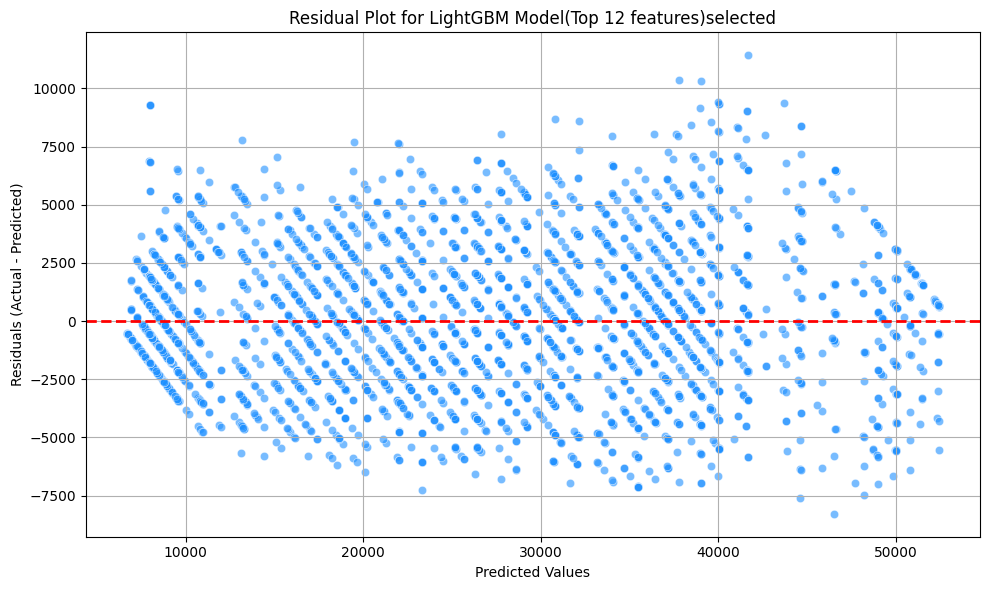

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Predict on validation set ---
y_pred = best_lgbm_top12_intern.predict(x_val_selected)

# --- Compute residuals ---
residuals = y_val - y_pred

# --- Residual Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='dodgerblue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for LightGBM Model(Top 12 features)selected')
plt.grid(True)
plt.tight_layout()
plt.savefig("Residual_Plot_LightGBM(Top 12 features)selected.jpg", dpi=300)
plt.show()

# Testing assumptions

Shapiro test or qq-plots are not needed for tree based models as they don't assume normality of residuals and don't assume linear relationships

## Model Performance Comparison and Final Model Selection

#### Training

In [ ]:
# Combine all models' training performance
models_df = pd.concat(
    [
       train_perf_lgbm.T,
       train_perf_lgbm_opt.T,
       train_perf_lgbm_top10.T,
       train_perf_lgbm_top12_intern.T
    ],
    axis=1
)

# Define appropriate column names (must match the number of columns in `models_df`)
models_df.columns = [
    "LGBM Model-1",
    'LGBM Model-2',
    'LGBM Model-3',
    'LGBM Model-4'

]

# Display the performance comparison DataFrame
print("Model performance comparison:")
models_df


Model performance comparison:


LGBM Model-1  LGBM Model-2  LGBM Model-3  LGBM Model-4
MAPE (%)        11.040695     11.045422     11.180398     11.471690
RMSE          2836.192386   2838.998543   2897.319160   2921.924477
R²               0.956683      0.956598      0.954796      0.954025
Adjusted R²      0.956592      0.956563      0.954770      0.953994

In [ ]:
# Combine all models' training performance
models_df = pd.concat(
    [
       val_perf_lgbm.T,
       val_perf_lgbm_opt.T,
       val_perf_lgbm_top10.T,
       val_perf_lgbm_top12_intern.T
    ],
    axis=1
)

# Define appropriate column names (must match the number of columns in `models_df`)
models_df.columns = [
    "LGBM Model-1",
    'LGBM Model-2',
    'LGBM Model-3',
    'LGBM Model-4'

]

# Display the performance comparison DataFrame
print("Model performance comparison:")
models_df


Model performance comparison:


LGBM Model-1  LGBM Model-2  LGBM Model-3  LGBM Model-5
MAPE (%)        11.307583     11.297940     11.444778     11.677827
RMSE          2920.994796   2922.493884   2981.597841   2981.963376
R²               0.954924      0.954878      0.953035      0.953023
Adjusted R²      0.954475      0.954709      0.952909      0.952872

# Ridge Model

Fitting 5 folds for each of 150 candidates, totalling 750 fits

RandomizedSearchCV fitting time: 47.69 seconds
Best Parameters: {'solver': 'saga', 'fit_intercept': True, 'alpha': np.float64(17.886495290574352)}
Best Cross-Validation RMSE: 3034.8734526988555

Training Performance:
    MAPE (%)         RMSE        R²  Adjusted R²
0  13.057721  3027.440615  0.950645      0.95054

Validation Performance:
    MAPE (%)         RMSE        R²  Adjusted R²
0  13.034703  3047.208415  0.950945     0.950456

RMSE Gap (Val - Train): 19.7678 → Overfitting


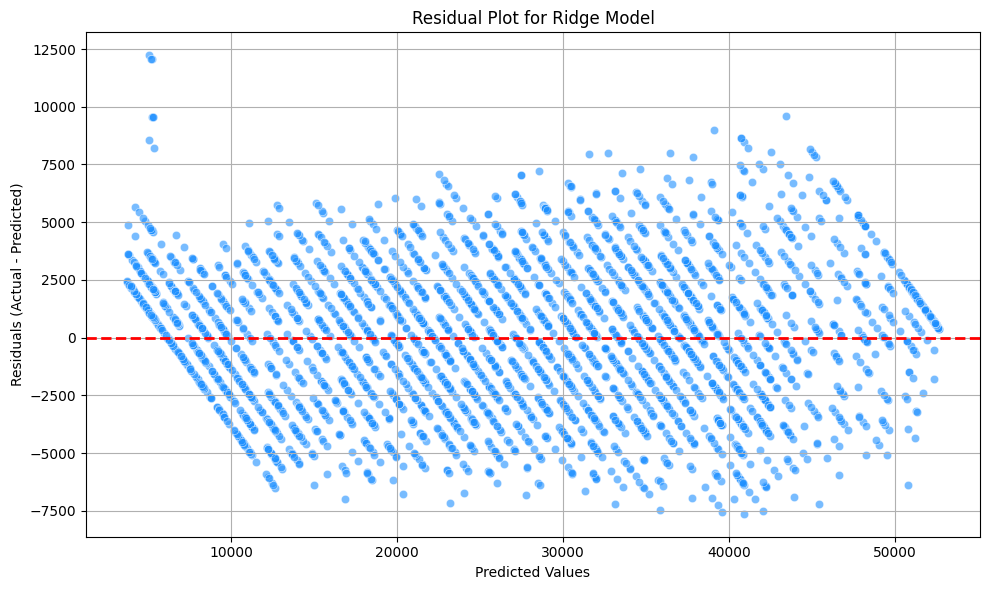

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, make_scorer

# --- Define RMSE scorer ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Evaluation Function ---
def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })

# --- Define Ridge model ---
ridge = Ridge(random_state=1)

# --- Hyperparameter grid ---
param_grid = {
    'alpha': np.logspace(-4, 4, 100),  # 100 values from 1e-4 to 1e4 (log scale)
    # Optionally add:
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']
}

# --- Randomized Search Setup ---
search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_grid,
    n_iter=150,
    scoring=rmse_scorer,
    cv=5,
    random_state=1,
    verbose=1,
    n_jobs=-1
)

# --- Fit and Time ---
start_time = time.time()
search.fit(x_train_processed, y_train)
print(f"\nRandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# --- Best Parameters and Score ---
print("Best Parameters:", search.best_params_)
print("Best Cross-Validation RMSE:", -search.best_score_)

# --- Retrain Best Estimator ---
best_ridge = search.best_estimator_
best_ridge.fit(x_train_processed, y_train)

# --- Evaluate on Train and Validation ---
print("\nTraining Performance:")
train_perf_Ridge = regression_performance_evaluation(best_ridge, x_train_processed, y_train)
print(train_perf_Ridge)

print("\nValidation Performance:")
val_perf_Ridge = regression_performance_evaluation(best_ridge, x_val_processed, y_val)
print(val_perf_Ridge)

# --- Optional: Overfitting Check ---
rmse_gap = val_perf_Ridge["RMSE"][0] - train_perf_Ridge["RMSE"][0]
print(f"\nRMSE Gap (Val - Train): {rmse_gap:.4f} → {'Overfitting' if rmse_gap > 5 else 'Acceptable'}")

# --- Predict on validation set ---
y_pred = best_ridge.predict(x_val_processed)

# --- Compute residuals ---
residuals = y_val - y_pred

# --- Residual Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='dodgerblue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Ridge Model')
plt.grid(True)
plt.tight_layout()
plt.savefig("Residual_Plot_Ridge.jpg", dpi=300)
plt.show()


#RFECV Method

Optimal number of features: 5
Selected Features:
 Index(['regular_checkups_last_year', 'weight', 'covered_by_other_company_Y',
       'adventure_sports', 'heart_disease_history'],
      dtype='object')


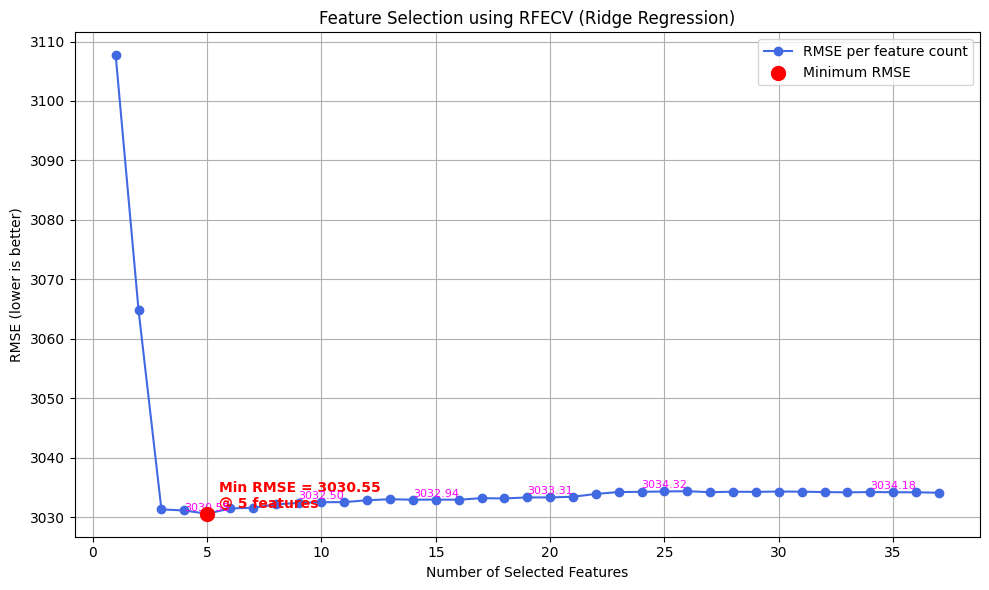

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Initialize Ridge Regression model
model = Ridge(random_state=1)

# Create RFECV object with Ridge Regression
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=KFold(n_splits=5, shuffle=True, random_state=1),
    scoring='neg_root_mean_squared_error',  # can also use 'neg_mean_squared_error' if preferred
    n_jobs=-1
)

# Fit RFECV
rfecv.fit(x_train_df, y_train)

# Optimal number of features
print("Optimal number of features:", rfecv.n_features_)

# Selected features
selected_features = x_train_df.columns[rfecv.support_]
print("Selected Features:\n", selected_features)

# Plotting RMSE vs number of features
n_features = np.arange(1, len(rfecv.cv_results_['mean_test_score']) + 1)
rmse_scores = -rfecv.cv_results_['mean_test_score']  # convert from negative RMSE

# Find the index and value of the minimum RMSE
min_rmse_idx = np.argmin(rmse_scores)
min_rmse = rmse_scores[min_rmse_idx]
best_feature_count = n_features[min_rmse_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_features, rmse_scores, marker='o', color='royalblue', label='RMSE per feature count')

# Annotate the best point
plt.scatter(best_feature_count, min_rmse, color='red', s=100, zorder=5, label='Minimum RMSE')
plt.text(best_feature_count + 0.5, min_rmse + 0.5,
         f'Min RMSE = {min_rmse:.2f}\n@ {best_feature_count} features',
         color='red', fontsize=10, ha='left', va='bottom', fontweight='bold')

# Label RMSE values at specific feature counts
for i in [5, 10, 15, 20, 25, 35]:
    if i <= len(rmse_scores):
        plt.text(i, rmse_scores[i - 1] + 0.5,
                 f"{rmse_scores[i - 1]:.2f}",
                 color='magenta', fontsize=8, ha='center')

# Labels and title
plt.xlabel("Number of Selected Features")
plt.ylabel("RMSE (lower is better)")
plt.title("Feature Selection using RFECV (Ridge Regression)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save and show
plt.savefig("Feature_Selection_Plot_Ridge.jpg", dpi=300)
plt.show()


Optimal number of features: 5
Selected Features:
 ['regular_checkups_last_year', 'weight', 'covered_by_other_company_Y', 'adventure_sports', 'heart_disease_history']
Fitting 5 folds for each of 200 candidates, totalling 1000 fits

RandomizedSearchCV fitting time: 24.49 seconds
Best Parameters: {'alpha': np.float64(2.2494738584331855), 'fit_intercept': True, 'solver': 'lsqr'}
Best Cross-Validation RMSE: 3030.1607873732823

Training Performance:
    MAPE (%)         RMSE        R²  Adjusted R²
0  13.080731  3029.489421  0.950578     0.950564

Validation Performance:
    MAPE (%)         RMSE        R²  Adjusted R²
0  13.049483  3046.301917  0.950974     0.950909

RMSE Gap (Val - Train): 16.8125 → Acceptable


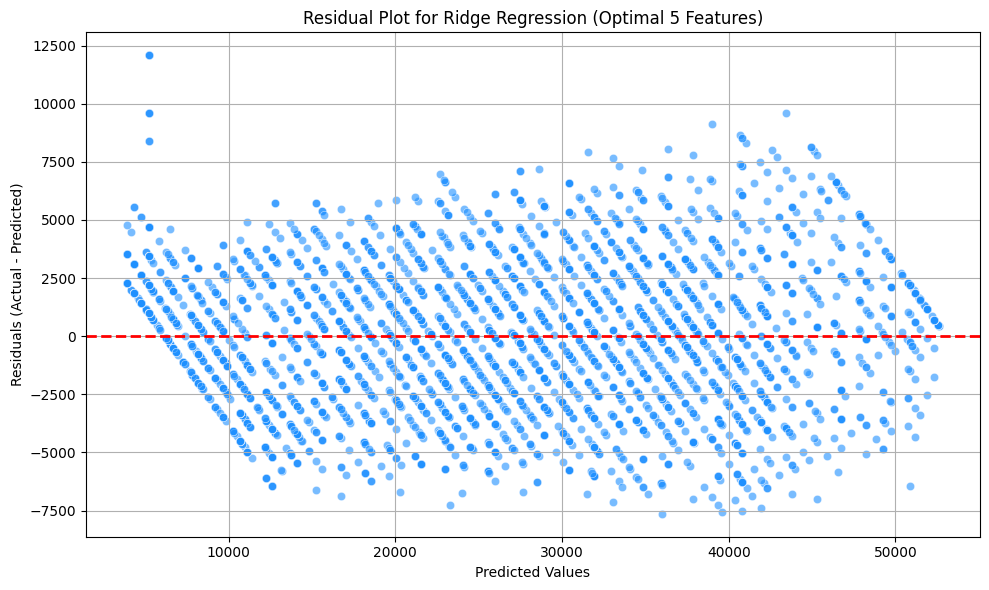

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    mean_squared_error, r2_score,
    mean_absolute_percentage_error, make_scorer
)
from scipy.stats import loguniform

# --- Define RMSE scorer ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Evaluation Function ---
def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })

# -----------------------------
# ✅ Train Ridge on Optimal Features
# -----------------------------
optimal_features = x_train_df.columns[rfecv.support_]
print("Optimal number of features:", len(optimal_features))
print("Selected Features:\n", optimal_features.tolist())

x_train_opt = x_train_df[optimal_features]
x_val_opt = x_val_df[optimal_features]

# --- Define Ridge model ---
ridge = Ridge(random_state=1)

# --- Hyperparameter space (expanded) ---
param_dist = {
    'alpha': loguniform(1e-4, 1e4),
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
}

# --- Randomized Search CV ---
search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_dist,
    n_iter=200,
    scoring=rmse_scorer,
    cv=5,
    random_state=1,
    verbose=1,
    n_jobs=-1
)

# --- Fit and Time ---
start_time = time.time()
search.fit(x_train_opt, y_train)
print(f"\nRandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# --- Best Parameters and Score ---
print("Best Parameters:", search.best_params_)
print("Best Cross-Validation RMSE:", -search.best_score_)

# --- Retrain Best Estimator ---
best_ridge = search.best_estimator_
best_ridge.fit(x_train_opt, y_train)

# --- Evaluate on Train and Validation ---
print("\nTraining Performance:")
train_perf_ridge = regression_performance_evaluation(best_ridge, x_train_opt, y_train)
print(train_perf_ridge)

print("\nValidation Performance:")
val_perf_ridge = regression_performance_evaluation(best_ridge, x_val_opt, y_val)
print(val_perf_ridge)

# --- Overfitting Check ---
rmse_gap_opt = val_perf_ridge["RMSE"][0] - train_perf_ridge["RMSE"][0]
print(f"\nRMSE Gap (Val - Train): {rmse_gap_opt:.4f} → {'Overfitting' if rmse_gap_opt > 500 else 'Acceptable'}")

# --- Residual Plot ---
y_pred_ridge = best_ridge.predict(x_val_opt)
residuals_ridge = y_val - y_pred_ridge

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge, color='dodgerblue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'Residual Plot for Ridge Regression (Optimal {len(optimal_features)} Features)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Residual_Plot_Ridge_Optimal_Features.jpg", dpi=300)
plt.show()


# Feature Importance

In [ ]:
# import shap
# explainer = shap.TreeExplainer(best_ridge)
# shap_values = explainer.shap_values(x_train_df[optimal_features])
# shap.summary_plot(shap_values, x_train_df[optimal_features])
# plt.savefig("SHAP_Summary_Plot_ridge_Top_10_Features.jpg", dpi=300)

# shap_interact = explainer.shap_interaction_values(x_train_df[optimal_features ])
# shap.summary_plot(shap_interact, x_train_df[optimal_features])
# plt.savefig("SHAP_Interaction_Plot_ridge_Top_10_Features.jpg", dpi=300)



InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._ridge.Ridge'>

✅ Optimal number of features: 7
✅ Selected Features:
 ['regular_checkups_last_year', 'weight', 'covered_by_other_company_Y', 'adventure_sports', 'heart_disease_history', 'weight_squared', 'weight_x_checkups']


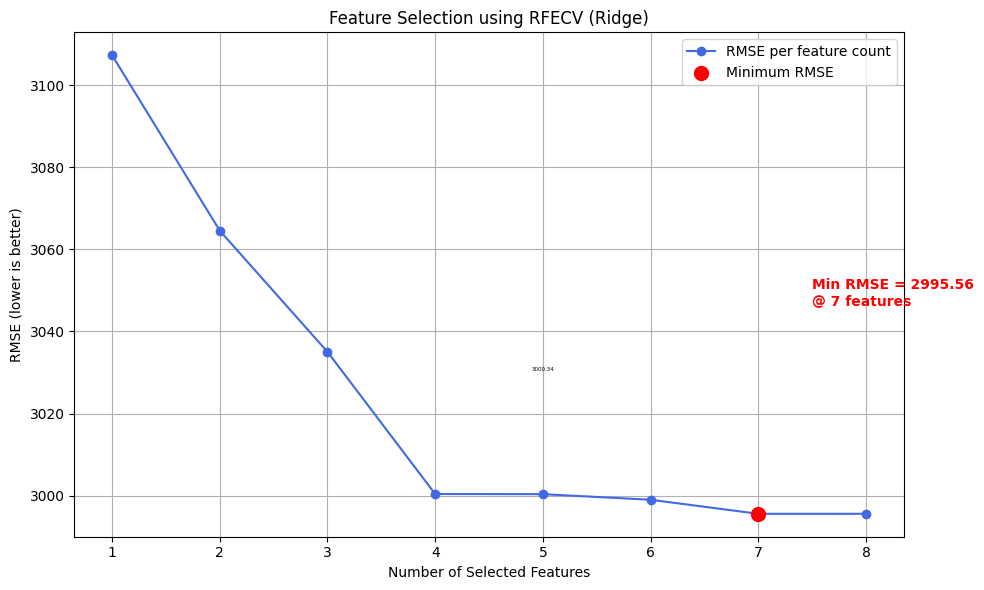

In [ ]:
import numpy as np
import pandas as pd

# -----------------------------------------------
# ✅ Create Copies of Original DataFrames
# -----------------------------------------------
x_train_df_with_intern = x_train_df[optimal_features].copy()
x_val_df_with_intern = x_val_df[optimal_features].copy()
x_test_df_with_intern = x_test_df[optimal_features].copy()

# ------------------------------------------------
# ✅ Feature Engineering: Interaction & Nonlinear Terms
# ------------------------------------------------

# ➤ Interaction: checkups × weight_change
x_train_df_with_intern['checkup_weight_interaction'] = (
    x_train_df_with_intern['regular_checkups_last_year'] * x_train_df_with_intern['weight']
)
x_val_df_with_intern['checkup_weight_interaction'] = (
    x_val_df_with_intern['regular_checkups_last_year'] * x_val_df_with_intern['weight']
)
x_test_df_with_intern['checkup_weight_interaction'] = (
    x_test_df_with_intern['regular_checkups_last_year'] * x_test_df_with_intern['weight']
)

# ➤ Square of weight
x_train_df_with_intern['weight_squared'] = x_train_df_with_intern['weight'] ** 2
x_val_df_with_intern['weight_squared'] = x_val_df_with_intern['weight'] ** 2
x_test_df_with_intern['weight_squared'] = x_test_df_with_intern['weight'] ** 2

# ➤ weight × checkups
x_train_df_with_intern['weight_x_checkups'] = (
    x_train_df_with_intern['weight'] * x_train_df_with_intern['regular_checkups_last_year']
)
x_val_df_with_intern['weight_x_checkups'] = (
    x_val_df_with_intern['weight'] * x_val_df_with_intern['regular_checkups_last_year']
)
x_test_df_with_intern['weight_x_checkups'] = (
    x_test_df_with_intern['weight'] * x_test_df_with_intern['regular_checkups_last_year']
)
# x_train_df_with_intern.info()
from sklearn.feature_selection import RFECV
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------------
# Step 1: Define Model and RFECV
# -----------------------------------
model = Ridge(random_state=1)

rfecv = RFECV(
    estimator=model,
    step=1,
    cv=KFold(n_splits=5),
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# -----------------------------------
# Step 2: Fit RFECV on Training Data
# -----------------------------------
rfecv.fit(x_train_df_with_intern, y_train)

# -----------------------------------
# Step 3: Extract Optimal Features
# -----------------------------------
print("✅ Optimal number of features:", rfecv.n_features_)

selected_features = x_train_df_with_intern.columns[rfecv.support_]
print("✅ Selected Features:\n", selected_features.tolist())

# -----------------------------------
# Step 4: RMSE Scores vs Feature Count Plot
# -----------------------------------
# Get number of features and RMSE values
n_features = np.arange(1, len(rfecv.cv_results_['mean_test_score']) + 1)
rmse_scores = -rfecv.cv_results_['mean_test_score']  # convert from negative RMSE

# Identify the best (minimum RMSE)
min_rmse_idx = np.argmin(rmse_scores)
min_rmse = rmse_scores[min_rmse_idx]
best_feature_count = n_features[min_rmse_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_features, rmse_scores, marker='o', color='royalblue', label='RMSE per feature count')

# Annotate best point
plt.scatter(best_feature_count, min_rmse, color='red', s=100, zorder=5, label='Minimum RMSE')
plt.text(best_feature_count + 0.5, min_rmse + 50,
         f'Min RMSE = {min_rmse:.2f}\n@ {best_feature_count} features',
         color='red', fontsize=10, ha='left', va='bottom', fontweight='bold')

# Label specific points for reference
for i in [5, 10, 15, 20, 25, 35,40,45]:
    if i <= len(rmse_scores):
        plt.text(i, rmse_scores[i - 1] + 30,
                 f"{rmse_scores[i - 1]:.2f}",
                 color='black', fontsize=4, ha='center')

# Final touches
plt.xlabel("Number of Selected Features")
plt.ylabel("RMSE (lower is better)")
plt.title("Feature Selection using RFECV (Ridge)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save and show
plt.savefig("Feature_Selection_Plot_Ridge_intern.jpg", dpi=300)
plt.show()

# -----------------------------------
# Step 5: Create Reduced Feature Datasets
# -----------------------------------
x_train_selected = x_train_df_with_intern[selected_features]
x_val_selected = x_val_df_with_intern[selected_features]
x_test_selected = x_test_df_with_intern[selected_features]

# These can now be used to train and evaluate your final model


Fitting 5 folds for each of 200 candidates, totalling 1000 fits

RandomizedSearchCV fitting time: 28.08 seconds
Best Parameters: {'alpha': np.float64(0.00016561541057220382), 'fit_intercept': True, 'solver': 'sag'}
Best Cross-Validation RMSE: 2995.551599959099

Training Performance:
   MAPE (%)         RMSE        R²  Adjusted R²
0  12.46822  2994.725023  0.951706     0.951686

Validation Performance:
    MAPE (%)         RMSE        R²  Adjusted R²
0  12.467793  3016.024371  0.951944     0.951854

RMSE Gap (Val - Train): 21.2993 → Acceptable


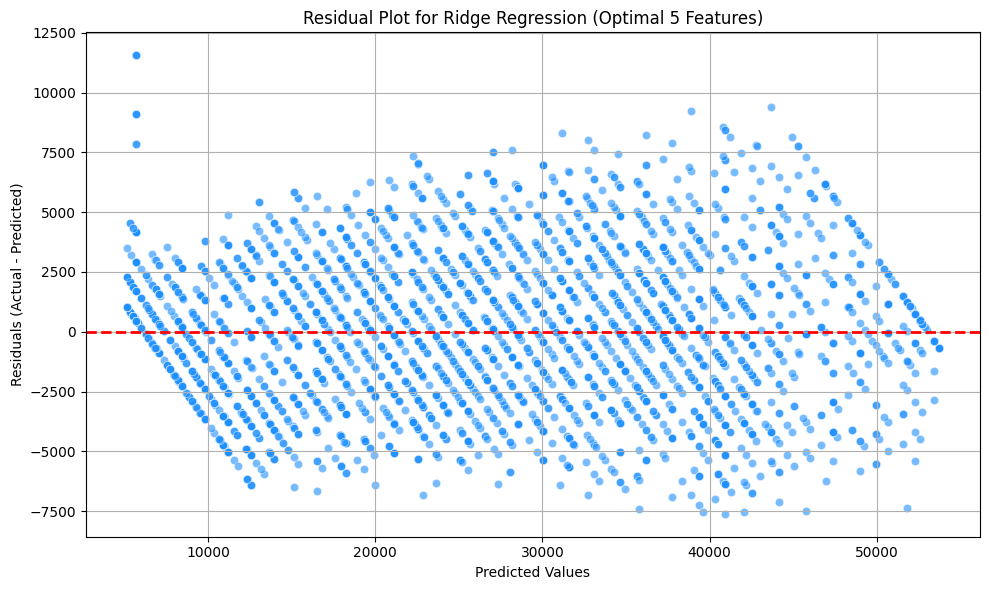

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    mean_squared_error, r2_score,
    mean_absolute_percentage_error, make_scorer
)
from scipy.stats import loguniform

# --- Define RMSE scorer ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Evaluation Function ---
def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })

# -----------------------------
# ✅ Train Ridge on Optimal Features
# -----------------------------
# optimal_features = x_train_df.columns[rfecv.support_]
# print("Optimal number of features:", len(optimal_features))
# print("Selected Features:\n", optimal_features.tolist())

x_train_opt = x_train_df_with_intern[selected_features]
x_val_opt = x_val_df_with_intern[selected_features]

# --- Define Ridge model ---
ridge = Ridge(random_state=1)

# --- Hyperparameter space (expanded) ---
param_dist = {
    'alpha': loguniform(1e-4, 1e4),
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
}

# --- Randomized Search CV ---
search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_dist,
    n_iter=200,
    scoring=rmse_scorer,
    cv=5,
    random_state=1,
    verbose=1,
    n_jobs=-1
)

# --- Fit and Time ---
start_time = time.time()
search.fit(x_train_opt, y_train)
print(f"\nRandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# --- Best Parameters and Score ---
print("Best Parameters:", search.best_params_)
print("Best Cross-Validation RMSE:", -search.best_score_)

# --- Retrain Best Estimator ---
best_ridge = search.best_estimator_
best_ridge.fit(x_train_opt, y_train)

# --- Evaluate on Train and Validation ---
print("\nTraining Performance:")
train_perf_ridge = regression_performance_evaluation(best_ridge, x_train_opt, y_train)
print(train_perf_ridge)

print("\nValidation Performance:")
val_perf_ridge = regression_performance_evaluation(best_ridge, x_val_opt, y_val)
print(val_perf_ridge)

# --- Overfitting Check ---
rmse_gap_opt = val_perf_ridge["RMSE"][0] - train_perf_ridge["RMSE"][0]
print(f"\nRMSE Gap (Val - Train): {rmse_gap_opt:.4f} → {'Overfitting' if rmse_gap_opt > 500 else 'Acceptable'}")

# --- Residual Plot ---
y_pred_ridge = best_ridge.predict(x_val_opt)
residuals_ridge = y_val - y_pred_ridge

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge, color='dodgerblue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'Residual Plot for Ridge Regression (Optimal {len(optimal_features)} Features)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Residual_Plot_Ridge_Optimal_Features.jpg", dpi=300)
plt.show()


# GBM Model

✅ Optimal number of features: 6
✅ Selected Features:
 ['regular_checkups_last_year', 'weight', 'covered_by_other_company_Y', 'weight_squared', 'weight_x_checkups', 'weight_x_weight_change']


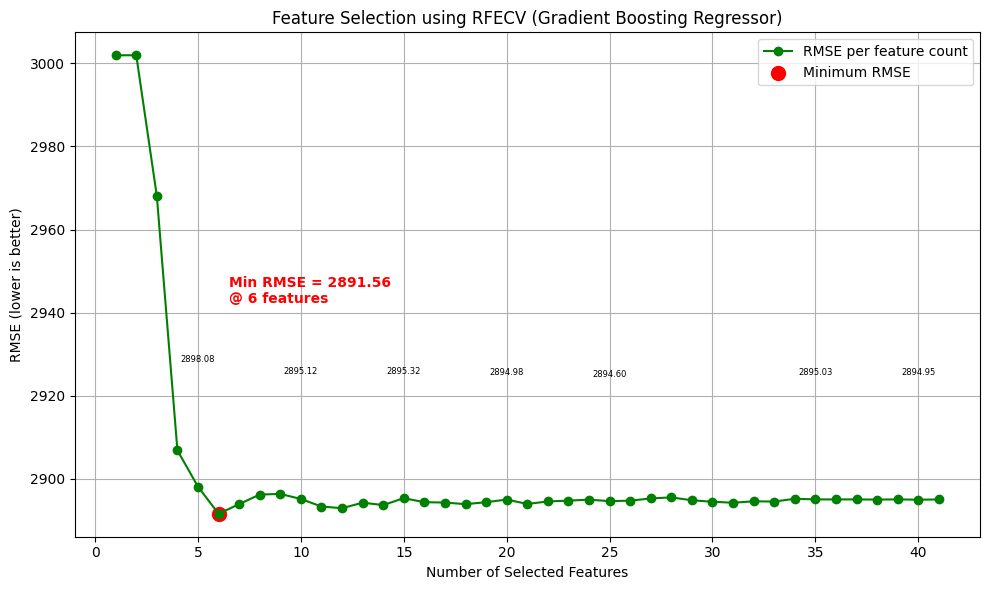

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingRegressor

# -----------------------------------------------
# ✅ Create Copies of Original DataFrames
# -----------------------------------------------
x_train_df_with_intern = x_train_df.copy()
x_val_df_with_intern = x_val_df.copy()
x_test_df_with_intern = x_test_df.copy()

# ------------------------------------------------
# ✅ Feature Engineering: Interaction & Nonlinear Terms
# ------------------------------------------------

# ➤ Interaction: checkups × weight_change
x_train_df_with_intern['checkup_weight_interaction'] = (
    x_train_df_with_intern['regular_checkups_last_year'] * x_train_df_with_intern['weight_change_last_year']
)
x_val_df_with_intern['checkup_weight_interaction'] = (
    x_val_df_with_intern['regular_checkups_last_year'] * x_val_df_with_intern['weight_change_last_year']
)
x_test_df_with_intern['checkup_weight_interaction'] = (
    x_test_df_with_intern['regular_checkups_last_year'] * x_test_df_with_intern['weight_change_last_year']
)

# ➤ Square of weight
x_train_df_with_intern['weight_squared'] = x_train_df_with_intern['weight'] ** 2
x_val_df_with_intern['weight_squared'] = x_val_df_with_intern['weight'] ** 2
x_test_df_with_intern['weight_squared'] = x_test_df_with_intern['weight'] ** 2

# ➤ weight × checkups
x_train_df_with_intern['weight_x_checkups'] = (
    x_train_df_with_intern['weight'] * x_train_df_with_intern['regular_checkups_last_year']
)
x_val_df_with_intern['weight_x_checkups'] = (
    x_val_df_with_intern['weight'] * x_val_df_with_intern['regular_checkups_last_year']
)
x_test_df_with_intern['weight_x_checkups'] = (
    x_test_df_with_intern['weight'] * x_test_df_with_intern['regular_checkups_last_year']
)

# ➤ weight × weight_change
x_train_df_with_intern['weight_x_weight_change'] = (
    x_train_df_with_intern['weight'] * x_train_df_with_intern['weight_change_last_year']
)
x_val_df_with_intern['weight_x_weight_change'] = (
    x_val_df_with_intern['weight'] * x_val_df_with_intern['weight_change_last_year']
)
x_test_df_with_intern['weight_x_weight_change'] = (
    x_test_df_with_intern['weight'] * x_test_df_with_intern['weight_change_last_year']
)

# -------------------------------------------------------
# ✅ Feature Selection using RFECV with GBM (Sklearn)
# -------------------------------------------------------

# Step 1: Define Model and RFECV
model = GradientBoostingRegressor(random_state=1)

rfecv = RFECV(
    estimator=model,
    step=1,
    cv=KFold(n_splits=5, shuffle=True, random_state=1),
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Step 2: Fit RFECV
rfecv.fit(x_train_df_with_intern, y_train)

# Step 3: Extract Optimal Features
print("✅ Optimal number of features:", rfecv.n_features_)
selected_features = x_train_df_with_intern.columns[rfecv.support_]
print("✅ Selected Features:\n", selected_features.tolist())

# Step 4: RMSE vs Number of Features Plot
n_features = np.arange(1, len(rfecv.cv_results_['mean_test_score']) + 1)
rmse_scores = -rfecv.cv_results_['mean_test_score']

min_rmse_idx = np.argmin(rmse_scores)
min_rmse = rmse_scores[min_rmse_idx]
best_feature_count = n_features[min_rmse_idx]

plt.figure(figsize=(10, 6))
plt.plot(n_features, rmse_scores, marker='o', color='green', label='RMSE per feature count')

# Annotate the best point
plt.scatter(best_feature_count, min_rmse, color='red', s=100, label='Minimum RMSE')
plt.text(best_feature_count + 0.5, min_rmse + 50,
         f'Min RMSE = {min_rmse:.2f}\n@ {best_feature_count} features',
         color='red', fontsize=10, ha='left', va='bottom', fontweight='bold')

# Label specific points
for i in [5, 10, 15, 20, 25, 35, 40, 45]:
    if i <= len(rmse_scores):
        plt.text(i, rmse_scores[i - 1] + 30,
                 f"{rmse_scores[i - 1]:.2f}",
                 color='black', fontsize=6, ha='center')

plt.xlabel("Number of Selected Features")
plt.ylabel("RMSE (lower is better)")
plt.title("Feature Selection using RFECV (Gradient Boosting Regressor)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Feature_Selection_Plot_GBM_intern.jpg", dpi=300)
plt.show()

# Step 5: Create Reduced Feature Sets
x_train_selected = x_train_df_with_intern[selected_features]
x_val_selected = x_val_df_with_intern[selected_features]
x_test_selected = x_test_df_with_intern[selected_features]


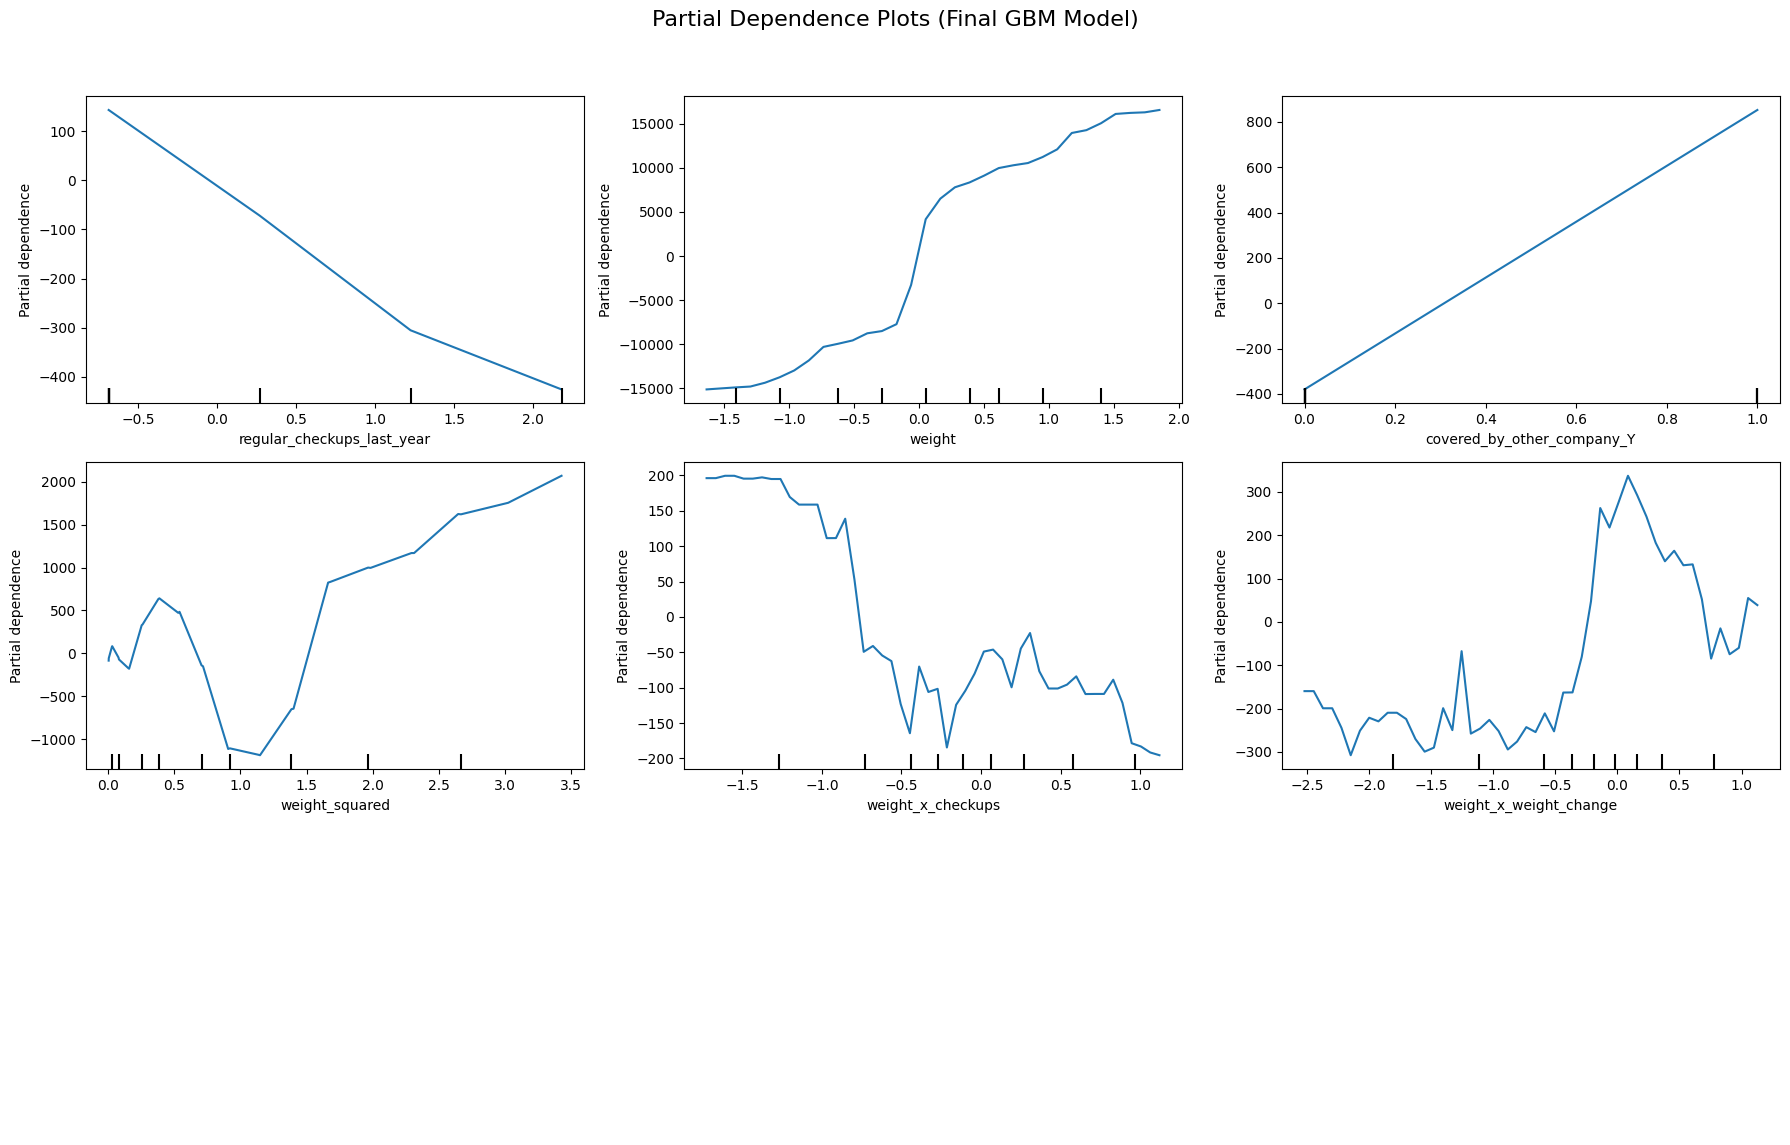

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Feature engineering
x_train_fe = x_train_df.copy()
for df in [x_train_fe]:
    df['checkup_weight_interaction'] = df['regular_checkups_last_year'] * df['weight_change_last_year']
    df['weight_squared'] = df['weight'] ** 2
    df['weight_x_checkups'] = df['weight'] * df['regular_checkups_last_year']
    df['weight_x_weight_change'] = df['weight'] * df['weight_change_last_year']

# Selected features and parameters
selected_features = [
    'regular_checkups_last_year',
    'weight',
    'covered_by_other_company_Y',
    'weight_squared',
    'weight_x_checkups',
    'weight_x_weight_change'
]

gbm_model = GradientBoostingRegressor(
    learning_rate=0.0771,
    max_depth=4,
    n_estimators=123,
    min_samples_leaf=6,
    min_samples_split=8,
    subsample=0.7826,
    max_features=None,
    random_state=42
)

# Fit the model
gbm_model.fit(x_train_fe[selected_features], y_train)

# Plot each PDP in a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    PartialDependenceDisplay.from_estimator(
        gbm_model,
        X=x_train_fe[selected_features],
        features=[feature],
        grid_resolution=50,
        ax=axes[i]
    )

# Hide unused subplots
for j in range(len(selected_features), len(axes)):
    axes[j].axis("off")

plt.suptitle("Partial Dependence Plots (Final GBM Model)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('ssss')
plt.show()


In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, make_scorer
from scipy.stats import uniform, randint

# --- Define RMSE scorer ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Evaluation Function ---
def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })

# ----------------------------------------
# 🧠 Train GBM on selected top features
# ----------------------------------------

# x_train_selected and x_val_selected assumed from RFECV earlier

# --- Define GBM Model ---
gbm_model = GradientBoostingRegressor(random_state=1)

# --- Expanded hyperparameter grid ---
param_grid = {
    'learning_rate': uniform(0.005, 0.3),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.7, 0.3),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# --- Randomized Search ---
search = RandomizedSearchCV(
    estimator=gbm_model,
    param_distributions=param_grid,
    n_iter=100,  # Increase for more thorough search
    scoring=rmse_scorer,
    cv=5,
    random_state=1,
    verbose=1,
    n_jobs=-1
)

# --- Fit & Time ---
start_time = time.time()
search.fit(x_train_selected, y_train)
print(f"\nRandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# --- Best Parameters and CV Score ---
print("Best Parameters:", search.best_params_)
print("Best Cross-Validation RMSE:", -search.best_score_)

# --- Retrain Best Estimator on Full Training Set ---
best_gbm_model = search.best_estimator_
best_gbm_model.fit(x_train_selected, y_train)

# --- Evaluate on Train and Validation Sets ---
print("\nTraining Performance:")
train_perf_gbm = regression_performance_evaluation(best_gbm_model, x_train_selected, y_train)
print(train_perf_gbm)

print("\nValidation Performance:")
val_perf_gbm = regression_performance_evaluation(best_gbm_model, x_val_selected, y_val)
print(val_perf_gbm)

# --- Overfitting Check ---
rmse_gap = val_perf_gbm["RMSE"][0] - train_perf_gbm["RMSE"][0]
print(f"\nRMSE Gap (Val - Train): {rmse_gap:.4f} → {'Overfitting' if rmse_gap > 500 else 'Acceptable'}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits

RandomizedSearchCV fitting time: 1485.56 seconds
Best Parameters: {'learning_rate': np.float64(0.07710668745474165), 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 8, 'n_estimators': 123, 'subsample': np.float64(0.7826410552013225)}
Best Cross-Validation RMSE: 2899.978537338149

Training Performance:
    MAPE (%)         RMSE        R²  Adjusted R²
0  11.087949  2852.815873  0.956584     0.956569

Validation Performance:
    MAPE (%)         RMSE        R²  Adjusted R²
0  11.234214  2875.453547  0.954428     0.954355

RMSE Gap (Val - Train): 22.6377 → Acceptable


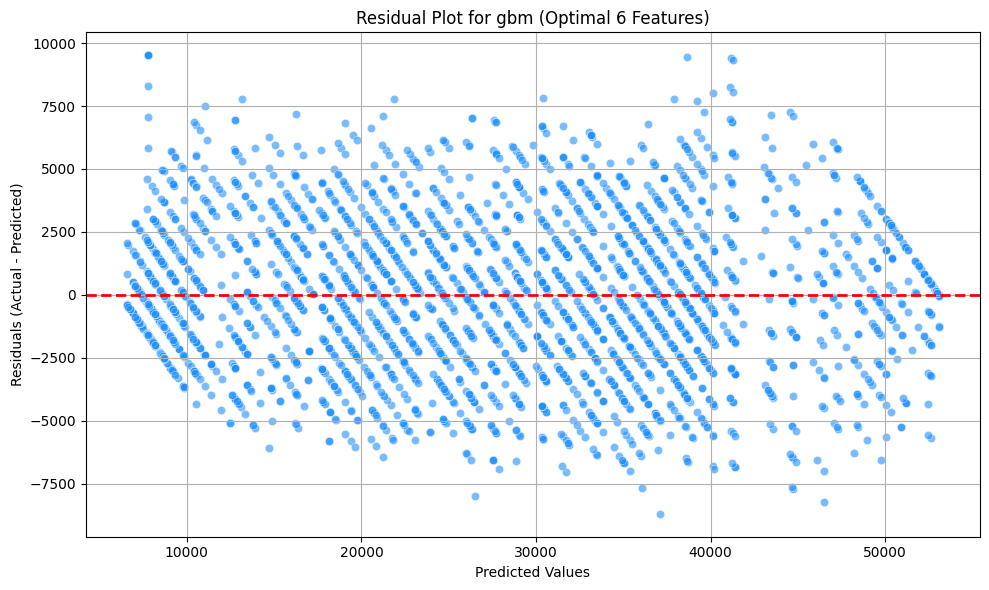

In [ ]:
# --- Residual Plot ---
y_pred_gbm = best_gbm_model.predict(x_val_selected)
residuals_gbm = y_val - y_pred_gbm

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_gbm, y=residuals_gbm, color='dodgerblue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'Residual Plot for gbm (Optimal {len(selected_features)} Features)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Residual_Plot_gbm_Optimal_Features.jpg", dpi=300)
plt.show()


🔝 Top Features by Importance:
                      Feature  Importance
0                      weight    0.829866
1              weight_squared    0.163755
2  covered_by_other_company_Y    0.002239
3           weight_x_checkups    0.002178
4      weight_x_weight_change    0.001243
5  regular_checkups_last_year    0.000719


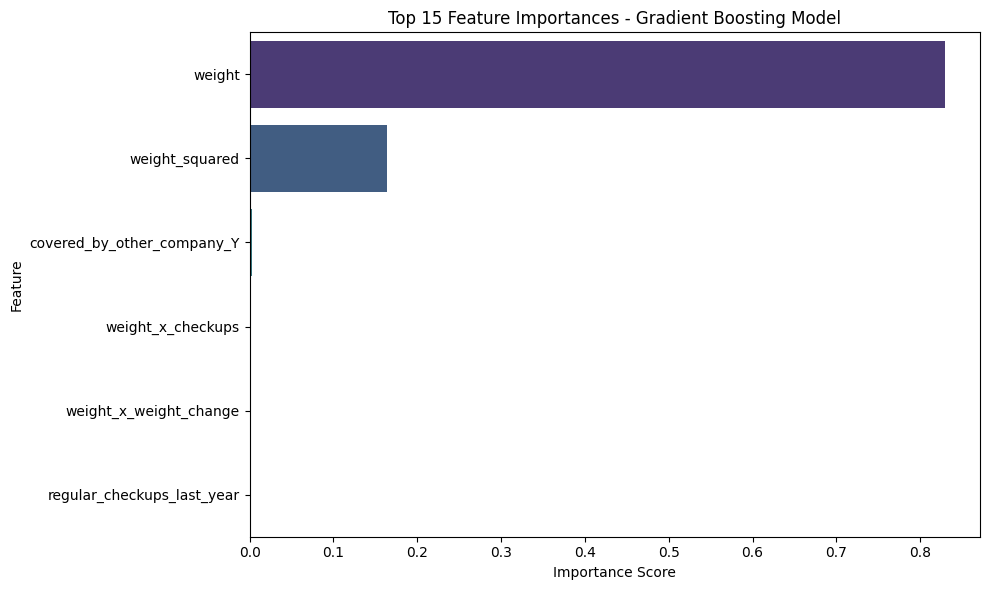

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Feature Importances from the trained GBM model ---
importances = best_gbm_model.feature_importances_
feature_names = x_train_selected.columns

# --- Create DataFrame for sorting ---
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# --- Display Top N Features ---
top_n = 15
print("\n🔝 Top Features by Importance:")
print(importance_df.head(top_n))

# --- Plot Feature Importances ---
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(top_n), x='Importance', y='Feature', palette='viridis')
plt.title(f"Top {top_n} Feature Importances - Gradient Boosting Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("GBM_Feature_Importances.jpg", dpi=300)
plt.show()


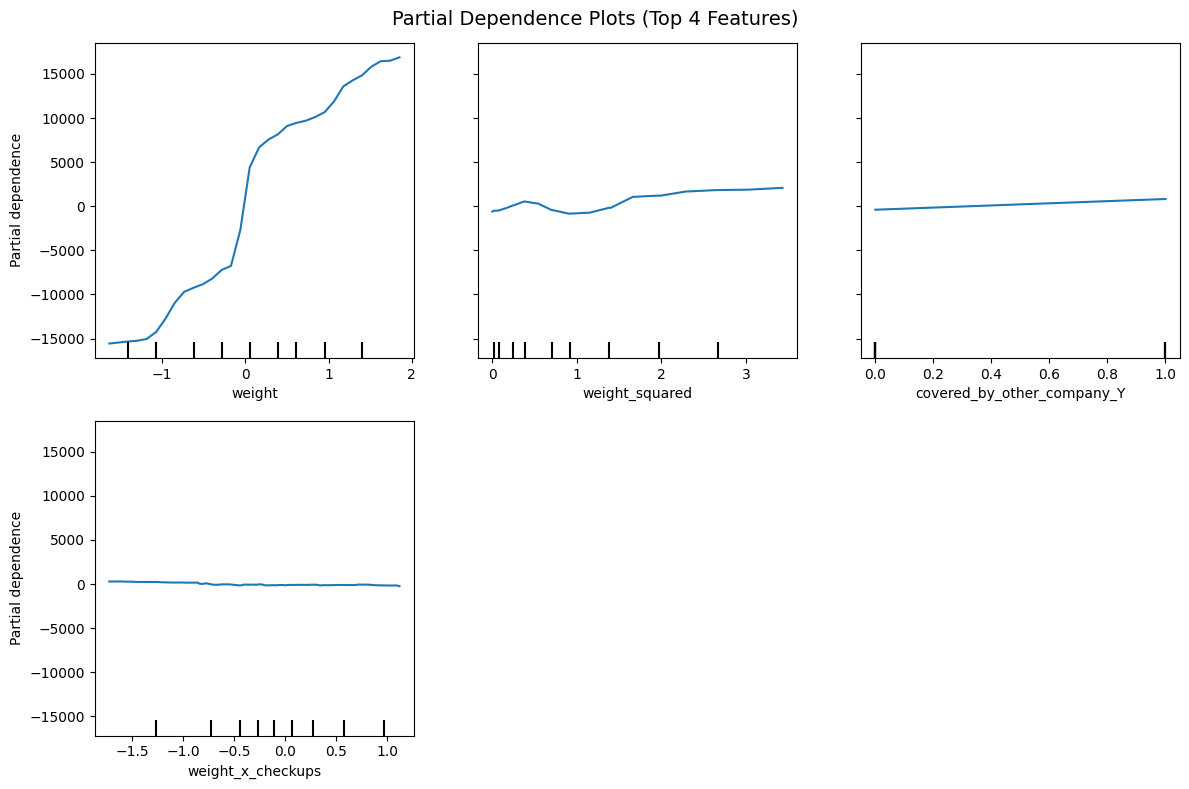

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# --- Select top features for PDPs ---
top_features = importance_df['Feature'].head(4).tolist()

# --- Partial Dependence Plots ---
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(best_gbm_model, x_train_selected, top_features, ax=ax)
plt.suptitle("Partial Dependence Plots (Top 4 Features)", fontsize=14)
plt.tight_layout()
plt.savefig("GBM_PDP_Top4.jpg", dpi=300)
plt.show()


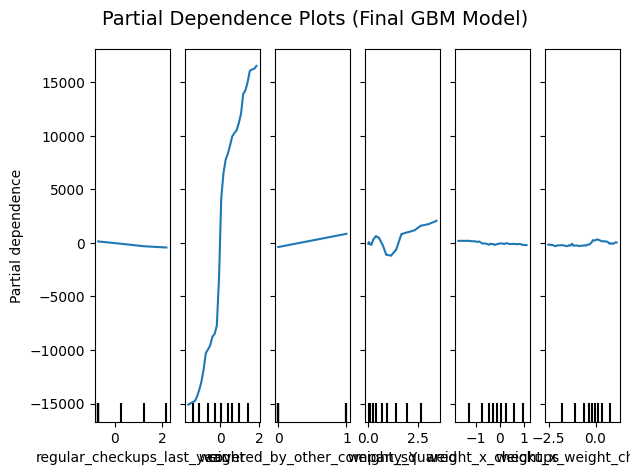

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# -----------------------------------------------
# ✅ Feature Engineering
# -----------------------------------------------
x_train_fe = x_train_df.copy()
x_val_fe = x_val_df.copy()
x_test_fe = x_test_df.copy()

for df in [x_train_fe, x_val_fe, x_test_fe]:
    df['checkup_weight_interaction'] = df['regular_checkups_last_year'] * df['weight_change_last_year']
    df['weight_squared'] = df['weight'] ** 2
    df['weight_x_checkups'] = df['weight'] * df['regular_checkups_last_year']
    df['weight_x_weight_change'] = df['weight'] * df['weight_change_last_year']
# Define selected features and best parameters
selected_features = [
    'regular_checkups_last_year',
    'weight',
    'covered_by_other_company_Y',
    'weight_squared',
    'weight_x_checkups',
    'weight_x_weight_change'
]

# Recreate and refit the model
gbm_model = GradientBoostingRegressor(
    learning_rate=0.0771,
    max_depth=4,
    n_estimators=123,
    min_samples_leaf=6,
    min_samples_split=8,
    subsample=0.7826,
    max_features=None,
    random_state=42
)

gbm_model.fit(x_train_df[selected_features], y_train)

# Generate Partial Dependence Plots
PartialDependenceDisplay.from_estimator(
    gbm_model,
    X_train[selected_features],
    features=selected_features,
    grid_resolution=50,
    n_cols=3,
    kind="average"
)
plt.suptitle("Partial Dependence Plots (Final GBM Model)", fontsize=14)
plt.tight_layout()
plt.show()


100%|===================| 17475/17500 [01:07<00:00]       

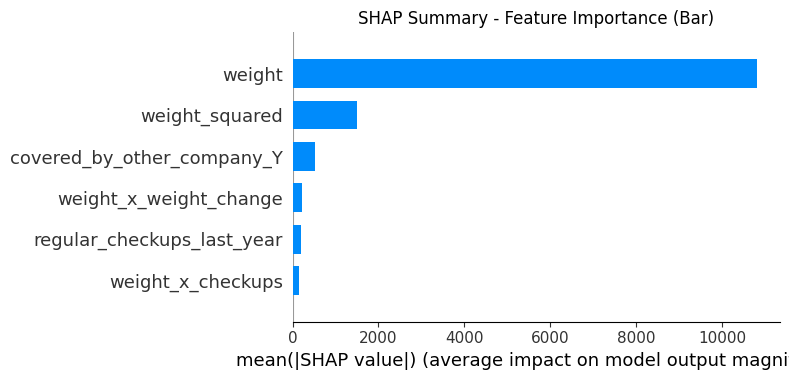

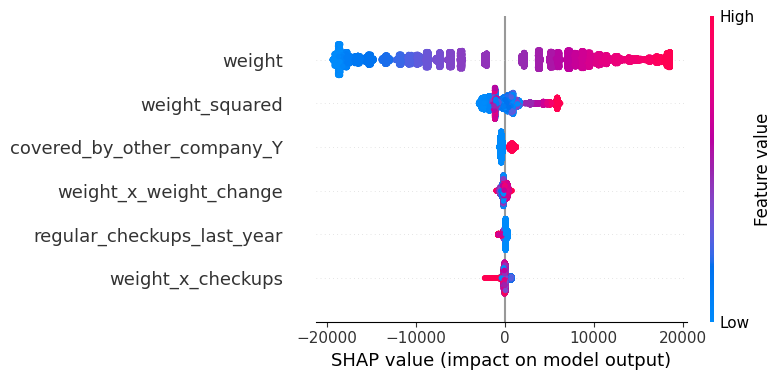

In [ ]:
import shap

# --- Create SHAP Explainer ---
explainer = shap.Explainer(best_gbm_model, x_train_selected)
shap_values = explainer(x_train_selected)

# --- SHAP Summary Plot (Global feature impact) ---
shap.summary_plot(shap_values, x_train_selected, plot_type="bar", show=False)
plt.title("SHAP Summary - Feature Importance (Bar)")
plt.tight_layout()
plt.savefig("GBM_SHAP_Summary_Bar.jpg", dpi=300)
plt.show()

# --- SHAP Summary Plot (Detailed Beeswarm) ---
shap.summary_plot(shap_values, x_train_selected)


# XGBoost

✅ Optimal number of features: 4
✅ Selected Features:
 ['regular_checkups_last_year', 'weight', 'covered_by_other_company_Y', 'weight_x_checkups']


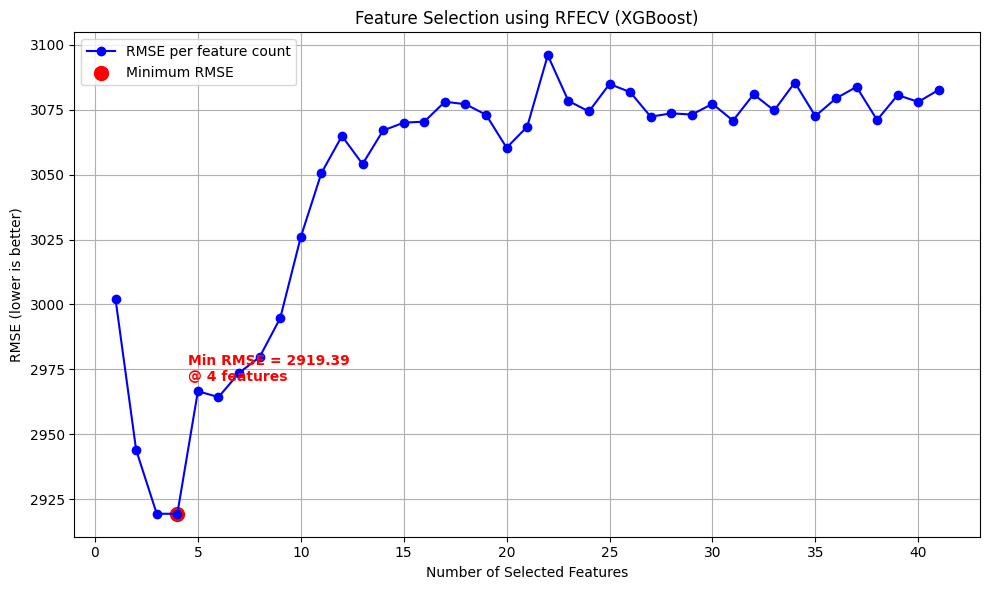

Fitting 5 folds for each of 100 candidates, totalling 500 fits

RandomizedSearchCV fitting time: 296.60 seconds
Best Parameters: {'colsample_bytree': np.float64(0.8454216692974053), 'gamma': np.float64(1.5998571742657097), 'learning_rate': np.float64(0.043569928463425306), 'max_depth': 3, 'min_child_weight': 9, 'n_estimators': 416, 'reg_alpha': np.float64(0.4629200871192516), 'reg_lambda': np.float64(1.7710343230351229), 'subsample': np.float64(0.6148351870622976)}
Best CV RMSE: 2906.8885521292095

Training Performance:
    MAPE (%)         RMSE        R²  Adjusted R²
0  11.295791  2884.373415  0.955618     0.955608

Validation Performance:
   MAPE (%)         RMSE        R²  Adjusted R²
0  11.32701  2878.158092  0.954342     0.954294

RMSE Gap (Val - Train): -6.2153 → Acceptable


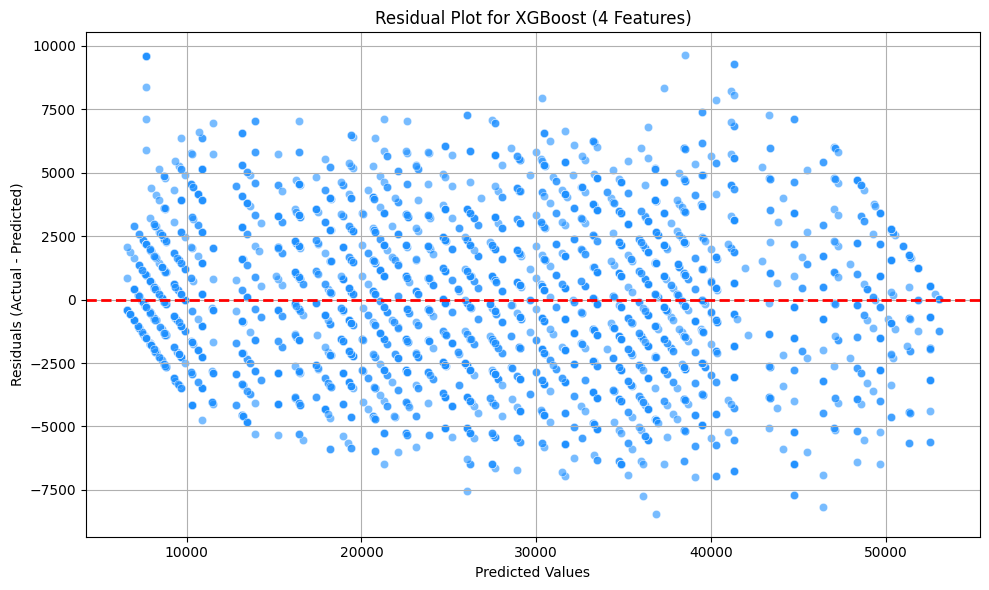

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from xgboost import XGBRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import (
    mean_squared_error, r2_score,
    mean_absolute_percentage_error, make_scorer
)
from scipy.stats import uniform, randint

# --- Define RMSE scorer ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Evaluation Function ---
def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })

# -----------------------------------------------
# ✅ Feature Engineering
# -----------------------------------------------
x_train_fe = x_train_df.copy()
x_val_fe = x_val_df.copy()
x_test_fe = x_test_df.copy()

for df in [x_train_fe, x_val_fe, x_test_fe]:
    df['checkup_weight_interaction'] = df['regular_checkups_last_year'] * df['weight_change_last_year']
    df['weight_squared'] = df['weight'] ** 2
    df['weight_x_checkups'] = df['weight'] * df['regular_checkups_last_year']
    df['weight_x_weight_change'] = df['weight'] * df['weight_change_last_year']

# -------------------------------------------------------
# ✅ Feature Selection using RFECV with XGBoost
# -------------------------------------------------------
xgb_estimator = XGBRegressor(random_state=1, n_jobs=-1, verbosity=0)

rfecv = RFECV(
    estimator=xgb_estimator,
    step=1,
    cv=KFold(n_splits=5, shuffle=True, random_state=1),
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

rfecv.fit(x_train_fe, y_train)

selected_features = x_train_fe.columns[rfecv.support_]
print("✅ Optimal number of features:", rfecv.n_features_)
print("✅ Selected Features:\n", selected_features.tolist())

# Plot RFECV RMSE Curve
n_features = np.arange(1, len(rfecv.cv_results_['mean_test_score']) + 1)
rmse_scores = -rfecv.cv_results_['mean_test_score']
min_rmse_idx = np.argmin(rmse_scores)
min_rmse = rmse_scores[min_rmse_idx]
best_feature_count = n_features[min_rmse_idx]

plt.figure(figsize=(10, 6))
plt.plot(n_features, rmse_scores, marker='o', color='blue', label='RMSE per feature count')
plt.scatter(best_feature_count, min_rmse, color='red', s=100, label='Minimum RMSE')
plt.text(best_feature_count + 0.5, min_rmse + 50,
         f'Min RMSE = {min_rmse:.2f}\n@ {best_feature_count} features',
         color='red', fontsize=10, ha='left', va='bottom', fontweight='bold')

plt.xlabel("Number of Selected Features")
plt.ylabel("RMSE (lower is better)")
plt.title("Feature Selection using RFECV (XGBoost)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Feature_Selection_Plot_XGBoost.jpg", dpi=300)
plt.show()

# -----------------------------
# 📦 Train XGBoost on Selected Features
# -----------------------------
x_train_selected = x_train_fe[selected_features]
x_val_selected = x_val_fe[selected_features]
x_test_selected = x_test_fe[selected_features]

xgb_model = XGBRegressor(random_state=1, n_jobs=-1, verbosity=0)

param_grid = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0.5, 2.0)
}

search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=200,
    scoring=rmse_scorer,
    cv=5,
    random_state=1,
    verbose=1,
    n_jobs=-1
)

start_time = time.time()
search.fit(x_train_selected, y_train)
print(f"\nRandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# --- Best Estimator ---
print("Best Parameters:", search.best_params_)
print("Best CV RMSE:", -search.best_score_)

best_xgb_model = search.best_estimator_
best_xgb_model.fit(x_train_selected, y_train)

# --- Evaluation ---
print("\nTraining Performance:")
train_perf = regression_performance_evaluation(best_xgb_model, x_train_selected, y_train)
print(train_perf)

print("\nValidation Performance:")
val_perf = regression_performance_evaluation(best_xgb_model, x_val_selected, y_val)
print(val_perf)

rmse_gap = val_perf["RMSE"][0] - train_perf["RMSE"][0]
print(f"\nRMSE Gap (Val - Train): {rmse_gap:.4f} → {'Overfitting' if rmse_gap > 500 else 'Acceptable'}")

# --- Residual Plot ---
y_pred_xgb = best_xgb_model.predict(x_val_selected)
residuals = y_val - y_pred_xgb

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_xgb, y=residuals, color='dodgerblue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'Residual Plot for XGBoost ({len(selected_features)} Features)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Residual_Plot_XGBoost_Selected_Features.jpg", dpi=300)
plt.show()



🔝 Ranked Features by XGBoost Importance:
                      Feature  Importance
1                      weight    0.768039
0  regular_checkups_last_year    0.120407
3           weight_x_checkups    0.102757
2  covered_by_other_company_Y    0.008798


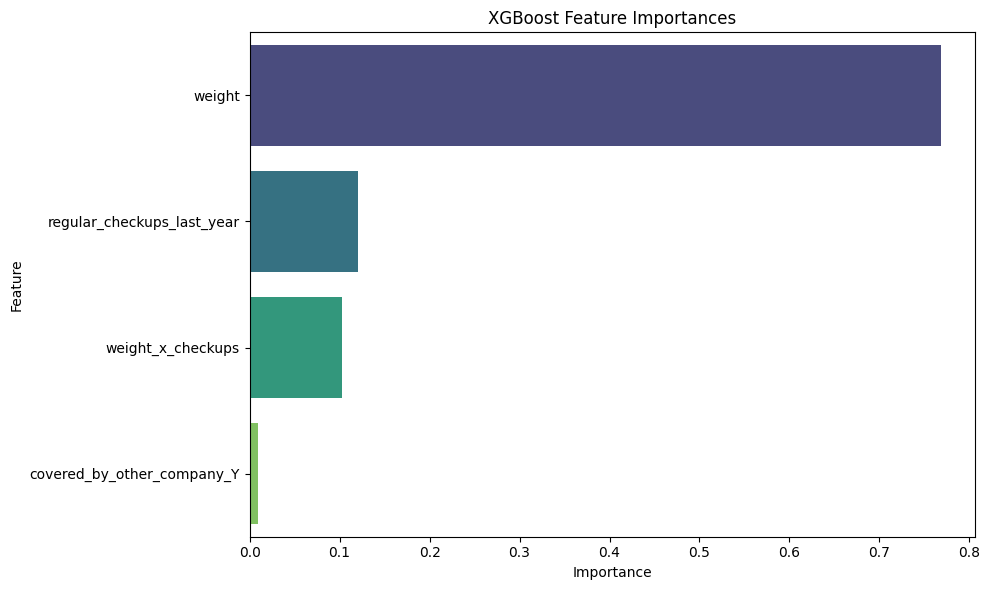

 97%|=================== | 3631/3750 [00:23<00:00]       

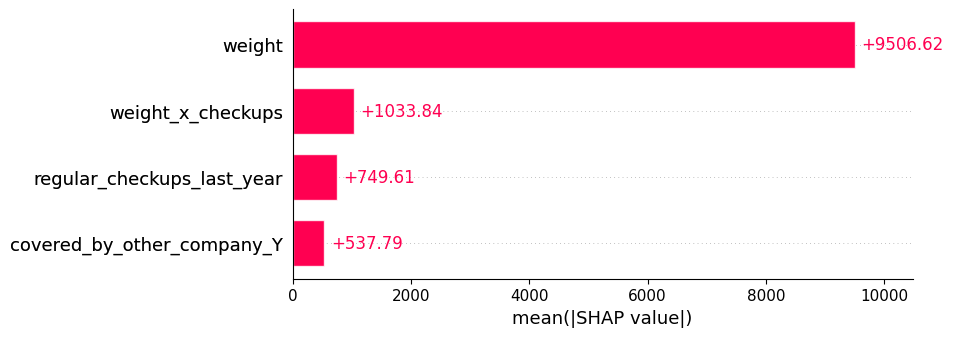

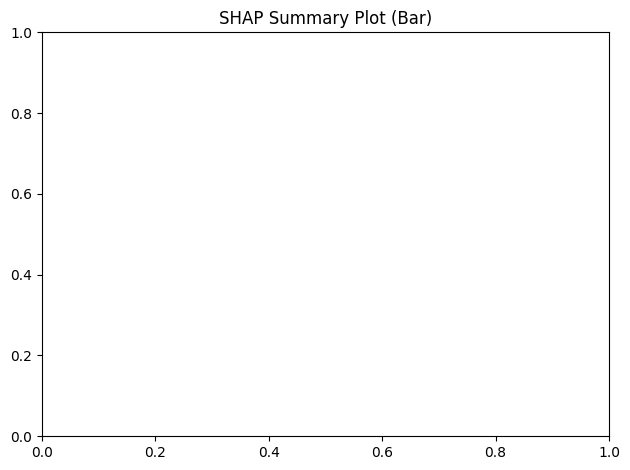

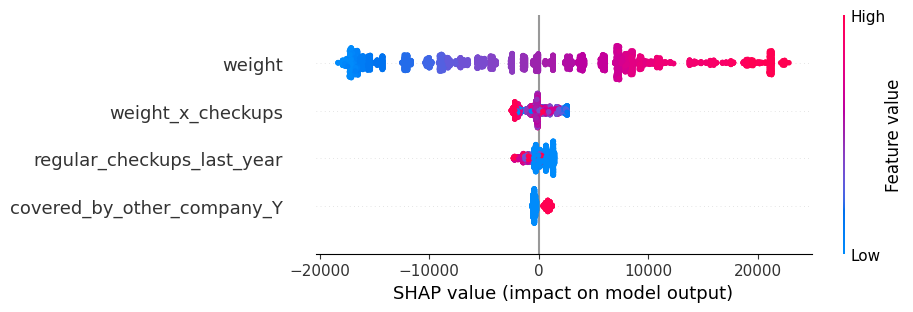

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap

# ------------------------------
# 📊 Feature Importance Plot
# ------------------------------
importances = best_xgb_model.feature_importances_
feature_names = x_train_selected.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display ranked features
print("\n🔝 Ranked Features by XGBoost Importance:")
print(importance_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.savefig("XGBoost_Feature_Importance_Barplot.jpg", dpi=300)
plt.show()
# ------------------------------
# 🔍 SHAP Summary Plot
# ------------------------------

# Create explainer and calculate SHAP values
explainer = shap.Explainer(best_xgb_model, x_train_selected)
shap_values = explainer(x_val_selected)

# Summary Plot (Bar)
shap.plots.bar(shap_values, max_display=15)
plt.title("SHAP Summary Plot (Bar)")
plt.tight_layout()
plt.savefig("XGBoost_SHAP_Bar.jpg", dpi=300)
plt.show()

# Summary Plot (Beeswarm)
shap.plots.beeswarm(shap_values, max_display=15)
plt.tight_layout()
plt.savefig("XGBoost_SHAP_Beeswarm.jpg", dpi=300)
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_import_factor
def checking_vif(predictors):


In [ ]:
# -----------------------------------------------
# ✅ Feature Engineering
# -----------------------------------------------
x_train_fe = x_train_df.copy()
x_val_fe = x_val_df.copy()
x_test_fe = x_test_df.copy()

for df in [x_train_fe, x_val_fe, x_test_fe]:
    df['checkup_weight_interaction'] = df['regular_checkups_last_year'] * df['weight_change_last_year']
    df['weight_squared'] = df['weight'] ** 2
    df['weight_x_checkups'] = df['weight'] * df['regular_checkups_last_year']
    df['weight_x_weight_change'] = df['weight'] * df['weight_change_last_year']
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif['Features'] = predictors.columns
    vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif
checking_vif(x_train_fe)

Features   VIF
15                     Gender_Male  3.52
12                        exercise  3.19
10               cholesterol_level  2.54
38                  weight_squared  2.51
11                         Alcohol  2.44
14              Occupation_Student  2.41
17     smoking_status_never smoked  2.37
16  smoking_status_formerly smoked  1.73
18           smoking_status_smokes  1.62
13              Occupation_Salried  1.59
33      covered_by_other_company_Y  1.52
19              Location_Bangalore  1.51
22                  Location_Delhi  1.48
20            Location_Bhubaneswar  1.48
28              Location_Mangalore  1.48
24                 Location_Jaipur  1.47
32                  Location_Surat  1.46
23               Location_Guwahati  1.46
29                 Location_Mumbai  1.46
27                Location_Lucknow  1.46
30                 Location_Nagpur  1.45
31                   Location_Pune  1.45
21                Location_Chennai  1.45
25                 Location_Kanpur  1.45
26                Location_Kolkata  1.45
40          weight_x_weight_change  1.44
39               weight_x_checkups  1.27
7                           weight  1.24
8          weight_change_last_year  1.20
36     other_major_disease_history  1.17
6                              bmi  1.16
37      checkup_weight_interaction  1.15
9                   fat_percentage  1.11
1       regular_checkups_last_year  1.10
34                adventure_sports  1.09
35           heart_disease_history  1.08
0       years_of_insurance_with_us  1.07
3                  avg_daily_steps  1.05
2          doctor_visits_last_year  1.04
5                avg_glucose_level  1.00
4                              age  1.00

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 41
[LightGBM] [Info] Start training from score 26856.705486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1277
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 40
[LightGBM] [Info] Start training from score 26856.705486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

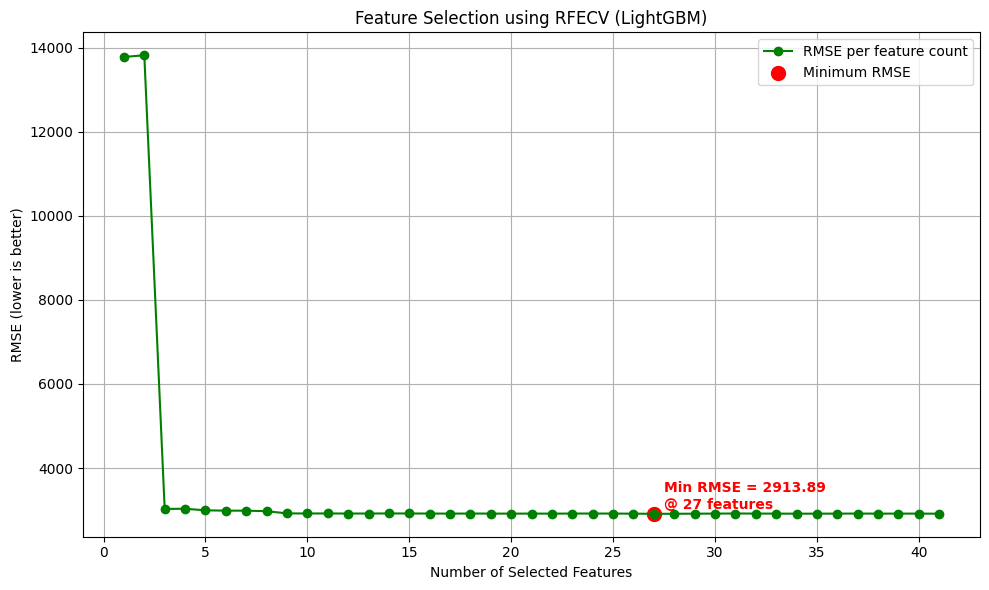

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1251
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 27
[LightGBM] [Info] Start training from score 26856.705486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

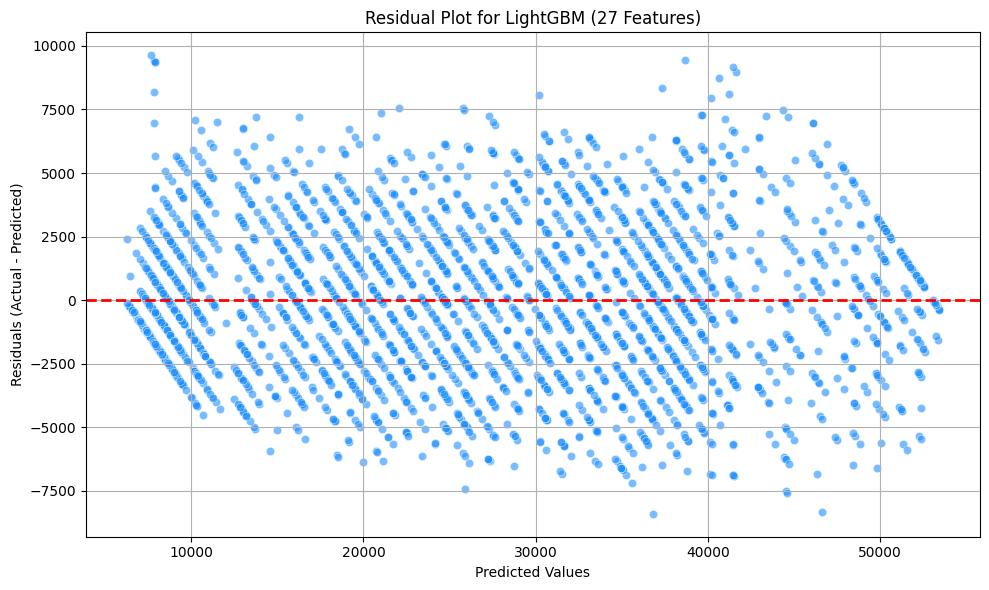

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import (
    mean_squared_error, r2_score,
    mean_absolute_percentage_error, make_scorer
)
from scipy.stats import uniform, randint

# --- Define RMSE scorer ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Evaluation Function ---
def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })

# -----------------------------------------------
# ✅ Feature Engineering
# -----------------------------------------------
x_train_fe = x_train_df.copy()
x_val_fe = x_val_df.copy()
x_test_fe = x_test_df.copy()

for df in [x_train_fe, x_val_fe, x_test_fe]:
    df['checkup_weight_interaction'] = df['regular_checkups_last_year'] * df['weight_change_last_year']
    df['weight_squared'] = df['weight'] ** 2
    df['weight_x_checkups'] = df['weight'] * df['regular_checkups_last_year']
    df['weight_x_weight_change'] = df['weight'] * df['weight_change_last_year']

# -------------------------------------------------------
# ✅ Feature Selection using RFECV with LightGBM
# -------------------------------------------------------
lgbm_estimator = LGBMRegressor(random_state=1, n_jobs=-1)

rfecv = RFECV(
    estimator=lgbm_estimator,
    step=1,
    cv=KFold(n_splits=5, shuffle=True, random_state=1),
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

rfecv.fit(x_train_fe, y_train)

selected_features = x_train_fe.columns[rfecv.support_]
print("✅ Optimal number of features:", rfecv.n_features_)
print("✅ Selected Features:\n", selected_features.tolist())

# Plot RFECV RMSE Curve
n_features = np.arange(1, len(rfecv.cv_results_['mean_test_score']) + 1)
rmse_scores = -rfecv.cv_results_['mean_test_score']
min_rmse_idx = np.argmin(rmse_scores)

min_rmse = rmse_scores[min_rmse_idx]
best_feature_count = n_features[min_rmse_idx]

plt.figure(figsize=(10, 6))
plt.plot(n_features, rmse_scores, marker='o', color='green', label='RMSE per feature count')
plt.scatter(best_feature_count, min_rmse, color='red', s=100, label='Minimum RMSE')
plt.text(best_feature_count + 0.5, min_rmse + 50,
         f'Min RMSE = {min_rmse:.2f}\n@ {best_feature_count} features',
         color='red', fontsize=10, ha='left', va='bottom', fontweight='bold')

plt.xlabel("Number of Selected Features")
plt.ylabel("RMSE (lower is better)")
plt.title("Feature Selection using RFECV (LightGBM)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Feature_Selection_Plot_LightGBM.jpg", dpi=300)
plt.show()

# -----------------------------
# 📦 Train LightGBM on Selected Features
# -----------------------------
x_train_selected = x_train_fe[selected_features]
x_val_selected = x_val_fe[selected_features]
x_test_selected = x_test_fe[selected_features]

lgbm_model = LGBMRegressor(random_state=1, n_jobs=-1)

# Expanded Hyperparameter Grid for LightGBM
param_grid = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 1000),
    'num_leaves': randint(20, 150),
    'max_depth': randint(2, 15),
    'min_child_samples': randint(5, 50),
    'subsample': uniform(0.8, 0.4),
    'colsample_bytree': uniform(0.1, 0.9),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0.5, 2.0)
}

search = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_grid,
    n_iter=300,
    scoring=rmse_scorer,
    cv=5,
    random_state=1,
    verbose=1,
    n_jobs=-1
)

start_time = time.time()
search.fit(x_train_selected, y_train)
print(f"\nRandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# --- Best Estimator ---
print("Best Parameters:", search.best_params_)
print("Best CV RMSE:", -search.best_score_)

best_lgbm_model = search.best_estimator_
best_lgbm_model.fit(x_train_selected, y_train)

# --- Evaluation ---
print("\nTraining Performance:")
train_perf = regression_performance_evaluation(best_lgbm_model, x_train_selected, y_train)
print(train_perf)

print("\nValidation Performance:")
val_perf = regression_performance_evaluation(best_lgbm_model, x_val_selected, y_val)
print(val_perf)

rmse_gap = val_perf["RMSE"][0] - train_perf["RMSE"][0]
print(f"\nRMSE Gap (Val - Train): {rmse_gap:.4f} → {'Overfitting' if rmse_gap > 500 else 'Acceptable'}")

# --- Residual Plot ---
y_pred_lgbm = best_lgbm_model.predict(x_val_selected)
residuals = y_val - y_pred_lgbm

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lgbm, y=residuals, color='dodgerblue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'Residual Plot for LightGBM ({len(selected_features)} Features)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Residual_Plot_LightGBM_Selected_Features.jpg", dpi=300)
plt.show()


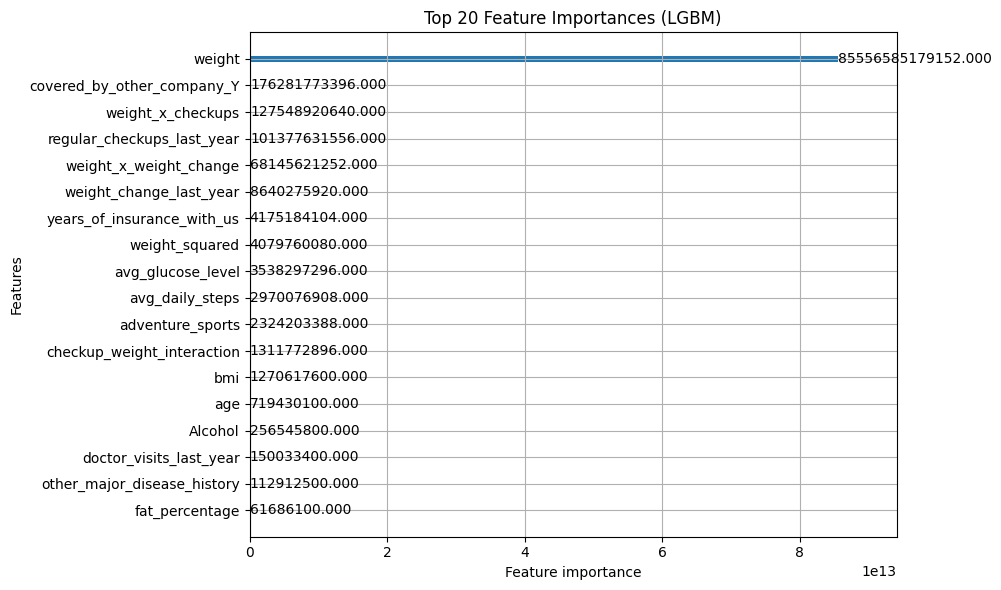

LightGBMError: The number of features in data (4) is not the same as it was in training data (27).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

In [ ]:
import matplotlib.pyplot as plt
import lightgbm as lgb

# Plot feature importances from the trained model
lgb.plot_importance(
    best_lgbm_model,
    max_num_features=20,  # Top 20 features
    importance_type='gain',  # 'split' for frequency, 'gain' for average gain
    figsize=(10, 6),
    title='Top 20 Feature Importances (LGBM)',
)
plt.tight_layout()
plt.savefig("LGBM_Feature_Importance.jpg", dpi=300)
plt.show()
import shap

# Create TreeExplainer
explainer = shap.TreeExplainer(best_lgbm_model)

# Calculate SHAP values for validation set
shap_values = explainer.shap_values(x_val_selected)

# Summary plot (top 20)
shap.summary_plot(shap_values, x_val_selected, plot_type="bar", max_display=20)
shap.summary_plot(shap_values, x_val_selected, max_display=20)


✅ Optimal number of features: 24
✅ Selected Features:
 ['regular_checkups_last_year', 'weight', 'weight_change_last_year', 'Occupation_Salried', 'Location_Bangalore', 'Location_Bhubaneswar', 'Location_Chennai', 'Location_Delhi', 'Location_Guwahati', 'Location_Jaipur', 'Location_Kanpur', 'Location_Kolkata', 'Location_Lucknow', 'Location_Mangalore', 'Location_Mumbai', 'Location_Nagpur', 'Location_Pune', 'Location_Surat', 'covered_by_other_company_Y', 'adventure_sports', 'heart_disease_history', 'other_major_disease_history', 'weight_squared', 'weight_x_checkups']


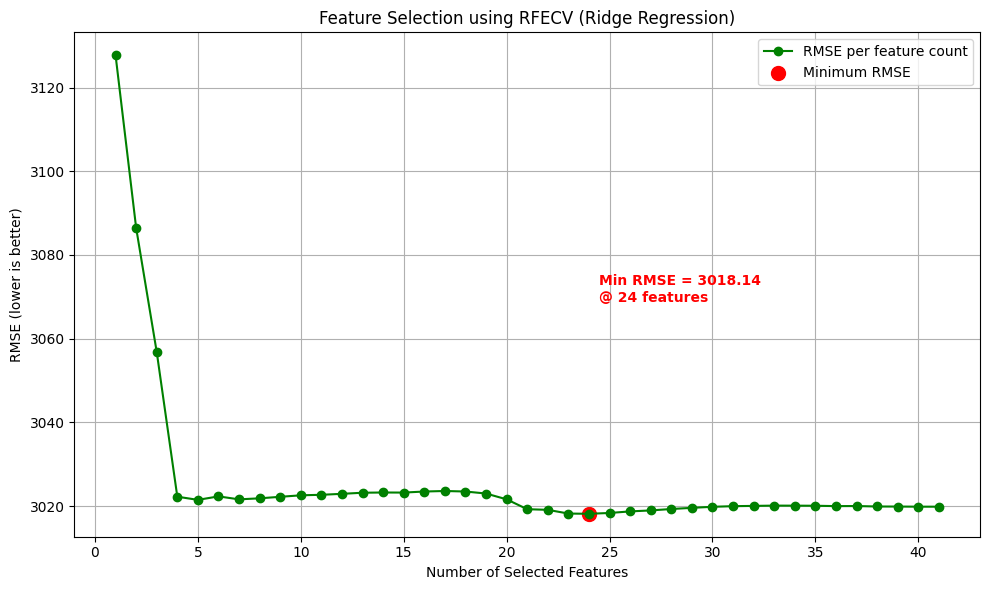

Fitting 5 folds for each of 300 candidates, totalling 1500 fits

RandomizedSearchCV fitting time: 14.83 seconds
Best Parameters: {'alpha': np.float64(9.983228504514805)}
Best CV RMSE: 3018.668362196303

Training Performance:
    MAPE (%)         RMSE       R²  Adjusted R²
0  12.588126  3013.656378  0.95155     0.951484

Validation Performance:
    MAPE (%)         RMSE        R²  Adjusted R²
0  12.360041  2982.656504  0.950967     0.950651

RMSE Gap (Val - Train): -30.9999 → Acceptable


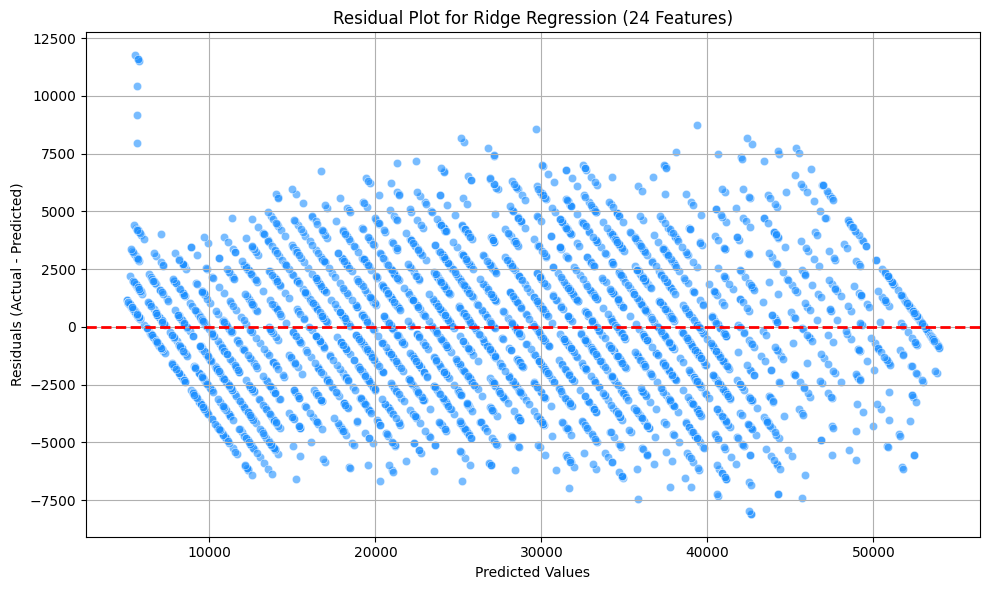

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import (
    mean_squared_error, r2_score,
    mean_absolute_percentage_error, make_scorer
)
from scipy.stats import uniform

# --- Define RMSE scorer ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Evaluation Function ---
def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })

# -----------------------------------------------
# ✅ Feature Engineering
# -----------------------------------------------
x_train_fe = x_train_df.copy()
x_val_fe = x_val_df.copy()
x_test_fe = x_test_df.copy()

for df in [x_train_fe, x_val_fe, x_test_fe]:
    df['checkup_weight_interaction'] = df['regular_checkups_last_year'] * df['weight_change_last_year']
    df['weight_squared'] = df['weight'] ** 2
    df['weight_x_checkups'] = df['weight'] * df['regular_checkups_last_year']
    df['weight_x_weight_change'] = df['weight'] * df['weight_change_last_year']

# -------------------------------------------------------
# ✅ Feature Selection using RFECV with Ridge
# -------------------------------------------------------
ridge_estimator = Ridge(random_state=1)

rfecv = RFECV(
    estimator=ridge_estimator,
    step=1,
    cv=KFold(n_splits=5, shuffle=True, random_state=1),
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

rfecv.fit(x_train_fe, y_train)

selected_features = x_train_fe.columns[rfecv.support_]
print("✅ Optimal number of features:", rfecv.n_features_)
print("✅ Selected Features:\n", selected_features.tolist())

# Plot RFECV RMSE Curve
n_features = np.arange(1, len(rfecv.cv_results_['mean_test_score']) + 1)
rmse_scores = -rfecv.cv_results_['mean_test_score']
min_rmse_idx = np.argmin(rmse_scores)

min_rmse = rmse_scores[min_rmse_idx]
best_feature_count = n_features[min_rmse_idx]

plt.figure(figsize=(10, 6))
plt.plot(n_features, rmse_scores, marker='o', color='green', label='RMSE per feature count')
plt.scatter(best_feature_count, min_rmse, color='red', s=100, label='Minimum RMSE')
plt.text(best_feature_count + 0.5, min_rmse + 50,
         f'Min RMSE = {min_rmse:.2f}\n@ {best_feature_count} features',
         color='red', fontsize=10, ha='left', va='bottom', fontweight='bold')

plt.xlabel("Number of Selected Features")
plt.ylabel("RMSE (lower is better)")
plt.title("Feature Selection using RFECV (Ridge Regression)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Feature_Selection_Plot_Ridge.jpg", dpi=300)
plt.show()

# -----------------------------
# 📦 Train Ridge on Selected Features
# -----------------------------
x_train_selected = x_train_fe[selected_features]
x_val_selected = x_val_fe[selected_features]
x_test_selected = x_test_fe[selected_features]

ridge_model = Ridge(random_state=1)

# Hyperparameter grid for Ridge
param_grid = {
    'alpha': uniform(0.01, 10.0)
}

search = RandomizedSearchCV(
    estimator=ridge_model,
    param_distributions=param_grid,
    n_iter=300,
    scoring=rmse_scorer,
    cv=5,
    random_state=1,
    verbose=1,
    n_jobs=-1
)

start_time = time.time()
search.fit(x_train_selected, y_train)
print(f"\nRandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# --- Best Estimator ---
print("Best Parameters:", search.best_params_)
print("Best CV RMSE:", -search.best_score_)

best_ridge_model = search.best_estimator_
best_ridge_model.fit(x_train_selected, y_train)

# --- Evaluation ---
print("\nTraining Performance:")
train_perf = regression_performance_evaluation(best_ridge_model, x_train_selected, y_train)
print(train_perf)

print("\nValidation Performance:")
val_perf = regression_performance_evaluation(best_ridge_model, x_val_selected, y_val)
print(val_perf)

rmse_gap = val_perf["RMSE"][0] - train_perf["RMSE"][0]
print(f"\nRMSE Gap (Val - Train): {rmse_gap:.4f} → {'Overfitting' if rmse_gap > 500 else 'Acceptable'}")

# --- Residual Plot ---
y_pred_ridge = best_ridge_model.predict(x_val_selected)
residuals = y_val - y_pred_ridge

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_ridge, y=residuals, color='dodgerblue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'Residual Plot for Ridge Regression ({len(selected_features)} Features)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Residual_Plot_Ridge_Selected_Features.jpg", dpi=300)
plt.show()


# Lasso Regression

✅ Optimal number of features: 15
✅ Selected Features:
 ['regular_checkups_last_year', 'weight', 'weight_change_last_year', 'Occupation_Salried', 'Location_Chennai', 'Location_Delhi', 'Location_Jaipur', 'Location_Mumbai', 'Location_Pune', 'covered_by_other_company_Y', 'adventure_sports', 'heart_disease_history', 'other_major_disease_history', 'weight_squared', 'weight_x_checkups']


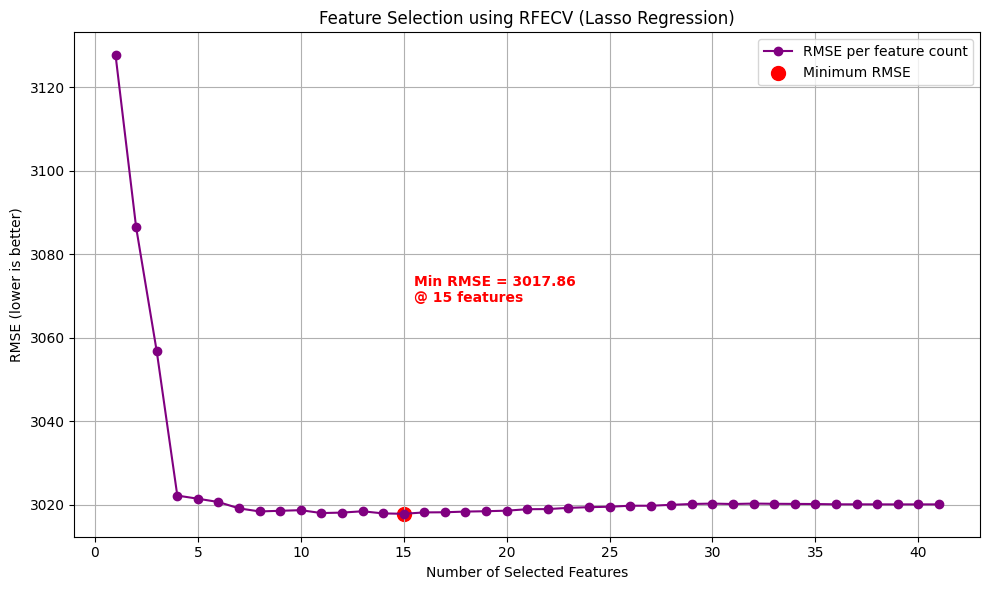

Fitting 5 folds for each of 300 candidates, totalling 1500 fits

RandomizedSearchCV fitting time: 19.54 seconds
Best Parameters: {'alpha': np.float64(0.9805118301943397), 'max_iter': 2521, 'selection': 'cyclic', 'tol': np.float64(0.002103324343121886)}
Best CV RMSE: 3017.635173168073

Training Performance:
    MAPE (%)         RMSE        R²  Adjusted R²
0  12.596315  3014.482611  0.951524     0.951482

Validation Performance:
    MAPE (%)         RMSE        R²  Adjusted R²
0  12.363761  2982.099707  0.950985     0.950788

RMSE Gap (Val - Train): -32.3829 → Acceptable


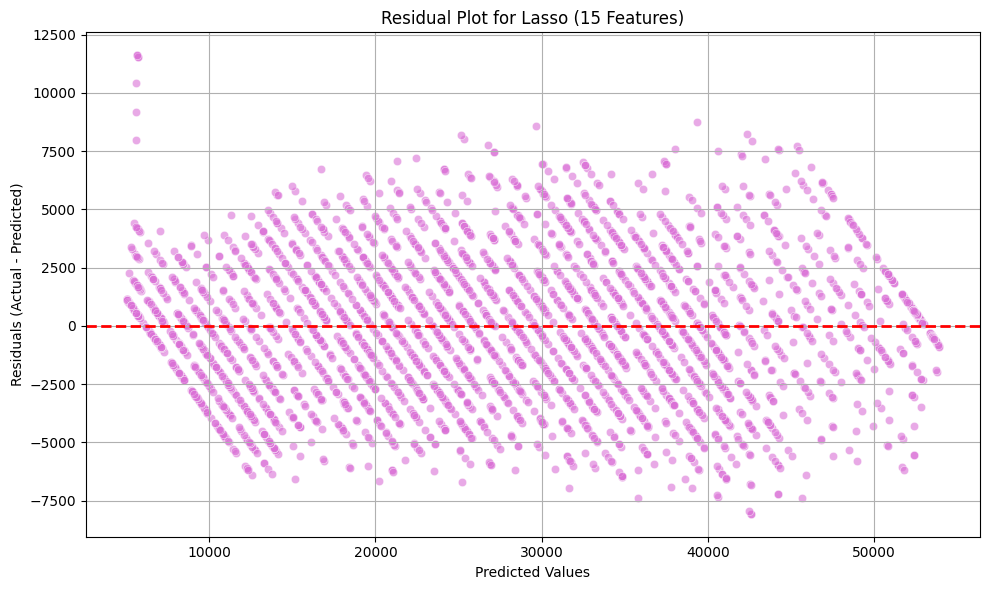

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import (
    mean_squared_error, r2_score,
    mean_absolute_percentage_error, make_scorer
)
from scipy.stats import uniform

# --- Define RMSE scorer ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Evaluation Function ---
def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })

# -----------------------------------------------
# ✅ Feature Engineering
# -----------------------------------------------
x_train_fe = x_train_df.copy()
x_val_fe = x_val_df.copy()
x_test_fe = x_test_df.copy()

for df in [x_train_fe, x_val_fe, x_test_fe]:
    df['checkup_weight_interaction'] = df['regular_checkups_last_year'] * df['weight_change_last_year']
    df['weight_squared'] = df['weight'] ** 2
    df['weight_x_checkups'] = df['weight'] * df['regular_checkups_last_year']
    df['weight_x_weight_change'] = df['weight'] * df['weight_change_last_year']

# -------------------------------------------------------
# ✅ Feature Selection using RFECV with Lasso
# -------------------------------------------------------
lasso_estimator = Lasso(random_state=1, max_iter=10000)

rfecv = RFECV(
    estimator=lasso_estimator,
    step=1,
    cv=KFold(n_splits=5, shuffle=True, random_state=1),
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

rfecv.fit(x_train_fe, y_train)

selected_features = x_train_fe.columns[rfecv.support_]
print("✅ Optimal number of features:", rfecv.n_features_)
print("✅ Selected Features:\n", selected_features.tolist())

# Plot RFECV RMSE Curve
n_features = np.arange(1, len(rfecv.cv_results_['mean_test_score']) + 1)
rmse_scores = -rfecv.cv_results_['mean_test_score']
min_rmse_idx = np.argmin(rmse_scores)
min_rmse = rmse_scores[min_rmse_idx]
best_feature_count = n_features[min_rmse_idx]

plt.figure(figsize=(10, 6))
plt.plot(n_features, rmse_scores, marker='o', color='purple', label='RMSE per feature count')
plt.scatter(best_feature_count, min_rmse, color='red', s=100, label='Minimum RMSE')
plt.text(best_feature_count + 0.5, min_rmse + 50,
         f'Min RMSE = {min_rmse:.2f}\n@ {best_feature_count} features',
         color='red', fontsize=10, ha='left', va='bottom', fontweight='bold')

plt.xlabel("Number of Selected Features")
plt.ylabel("RMSE (lower is better)")
plt.title("Feature Selection using RFECV (Lasso Regression)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Feature_Selection_Plot_Lasso.jpg", dpi=300)
plt.show()

# -----------------------------
# 📦 Train Lasso on Selected Features
# -----------------------------
x_train_selected = x_train_fe[selected_features]
x_val_selected = x_val_fe[selected_features]
x_test_selected = x_test_fe[selected_features]

lasso_model = Lasso(random_state=1, max_iter=10000)

param_grid = {
    'alpha': uniform(0.0001, 1.0),
    'max_iter': randint(500, 5000),
    'tol': uniform(1e-5, 1e-2),
    'selection': ['cyclic', 'random']
}

search = RandomizedSearchCV(
    estimator=lasso_model,
    param_distributions=param_grid,
    n_iter=300,
    scoring=rmse_scorer,
    cv=5,
    random_state=1,
    verbose=1,
    n_jobs=-1
)

start_time = time.time()
search.fit(x_train_selected, y_train)
print(f"\nRandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# --- Best Estimator ---
print("Best Parameters:", search.best_params_)
print("Best CV RMSE:", -search.best_score_)

best_lasso_model = search.best_estimator_
best_lasso_model.fit(x_train_selected, y_train)

# --- Evaluation ---
print("\nTraining Performance:")
train_perf = regression_performance_evaluation(best_lasso_model, x_train_selected, y_train)
print(train_perf)

print("\nValidation Performance:")
val_perf = regression_performance_evaluation(best_lasso_model, x_val_selected, y_val)
print(val_perf)

rmse_gap = val_perf["RMSE"][0] - train_perf["RMSE"][0]
print(f"\nRMSE Gap (Val - Train): {rmse_gap:.4f} → {'Overfitting' if rmse_gap > 500 else 'Acceptable'}")

# --- Residual Plot ---
y_pred_lasso = best_lasso_model.predict(x_val_selected)
residuals = y_val - y_pred_lasso

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lasso, y=residuals, color='orchid', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'Residual Plot for Lasso ({len(selected_features)} Features)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Residual_Plot_Lasso_Selected_Features.jpg", dpi=300)
plt.show()


# Random Forest Regression

✅ Optimal number of features: 38
✅ Selected Features:
 ['years_of_insurance_with_us', 'regular_checkups_last_year', 'doctor_visits_last_year', 'avg_daily_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'weight_change_last_year', 'fat_percentage', 'cholesterol_level', 'Alcohol', 'exercise', 'Occupation_Salried', 'Occupation_Student', 'Gender_Male', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'Location_Bangalore', 'Location_Bhubaneswar', 'Location_Chennai', 'Location_Delhi', 'Location_Guwahati', 'Location_Jaipur', 'Location_Kolkata', 'Location_Lucknow', 'Location_Mangalore', 'Location_Nagpur', 'Location_Pune', 'Location_Surat', 'covered_by_other_company_Y', 'adventure_sports', 'other_major_disease_history', 'checkup_weight_interaction', 'weight_squared', 'weight_x_checkups', 'weight_x_weight_change']


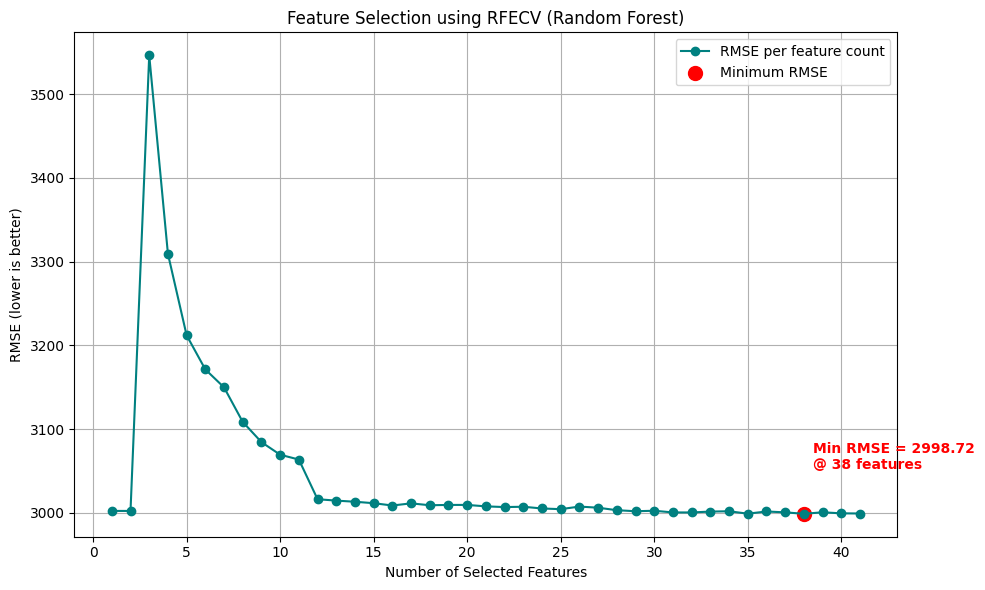

TypeError: Parameter grid for parameter 'n_estimators' is not iterable or a distribution (value=38)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import (
    mean_squared_error, r2_score,
    mean_absolute_percentage_error, make_scorer
)
from scipy.stats import randint

# --- Define RMSE scorer ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Evaluation Function ---
def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })

# -----------------------------------------------
# ✅ Feature Engineering
# -----------------------------------------------
x_train_fe = x_train_df.copy()
x_val_fe = x_val_df.copy()
x_test_fe = x_test_df.copy()

for df in [x_train_fe, x_val_fe, x_test_fe]:
    df['checkup_weight_interaction'] = df['regular_checkups_last_year'] * df['weight_change_last_year']
    df['weight_squared'] = df['weight'] ** 2
    df['weight_x_checkups'] = df['weight'] * df['regular_checkups_last_year']
    df['weight_x_weight_change'] = df['weight'] * df['weight_change_last_year']

# -------------------------------------------------------
# ✅ Feature Selection using RFECV with Random Forest
# -------------------------------------------------------
rf_estimator = RandomForestRegressor(random_state=1, n_jobs=-1)

rfecv = RFECV(
    estimator=rf_estimator,
    step=1,
    cv=KFold(n_splits=5, shuffle=True, random_state=1),
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

rfecv.fit(x_train_fe, y_train)

selected_features = x_train_fe.columns[rfecv.support_]
print("✅ Optimal number of features:", rfecv.n_features_)
print("✅ Selected Features:\n", selected_features.tolist())

# Plot RFECV RMSE Curve
n_features = np.arange(1, len(rfecv.cv_results_['mean_test_score']) + 1)
rmse_scores = -rfecv.cv_results_['mean_test_score']
min_rmse_idx = np.argmin(rmse_scores)
min_rmse = rmse_scores[min_rmse_idx]
best_feature_count = n_features[min_rmse_idx]

plt.figure(figsize=(10, 6))
plt.plot(n_features, rmse_scores, marker='o', color='teal', label='RMSE per feature count')
plt.scatter(best_feature_count, min_rmse, color='red', s=100, label='Minimum RMSE')
plt.text(best_feature_count + 0.5, min_rmse + 50,
         f'Min RMSE = {min_rmse:.2f}\n@ {best_feature_count} features',
         color='red', fontsize=10, ha='left', va='bottom', fontweight='bold')

plt.xlabel("Number of Selected Features")
plt.ylabel("RMSE (lower is better)")
plt.title("Feature Selection using RFECV (Random Forest)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Feature_Selection_Plot_RF.jpg", dpi=300)
plt.show()

# -----------------------------
# 📦 Train Random Forest on Selected Features
# -----------------------------
x_train_selected = x_train_fe[selected_features]
x_val_selected = x_val_fe[selected_features]
x_test_selected = x_test_fe[selected_features]

rf_model = RandomForestRegressor(random_state=1, n_jobs=-1)

from scipy.stats import randint, uniform

param_grid = {
    'n_estimators': 38,               # more trees, better stability
    'max_depth': randint(6, 40),                      # deeper trees for capturing more complexity
    'min_samples_split': randint(2, 15),              # prevent overfitting
    'min_samples_leaf': randint(1, 10),               # control leaf size for generalization
    'max_features': ['auto', 'sqrt', 'log2', 0.3, 0.5, 0.7]  # include float fractions as well
}


search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=30,
    scoring=rmse_scorer,
    cv=3,
    random_state=1,
    verbose=1,
    n_jobs=-1
)

start_time = time.time()
search.fit(x_train_selected, y_train)
print(f"\nRandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# --- Best Estimator ---
print("Best Parameters:", search.best_params_)
print("Best CV RMSE:", -search.best_score_)

best_rf_model = search.best_estimator_
best_rf_model.fit(x_train_selected, y_train)

# --- Evaluation ---
print("\nTraining Performance:")
train_perf = regression_performance_evaluation(best_rf_model, x_train_selected, y_train)
print(train_perf)

print("\nValidation Performance:")
val_perf = regression_performance_evaluation(best_rf_model, x_val_selected, y_val)
print(val_perf)

rmse_gap = val_perf["RMSE"][0] - train_perf["RMSE"][0]
print(f"\nRMSE Gap (Val - Train): {rmse_gap:.4f} → {'Overfitting' if rmse_gap > 500 else 'Acceptable'}")

# --- Residual Plot ---
y_pred_rf = best_rf_model.predict(x_val_selected)
residuals = y_val - y_pred_rf

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals, color='darkorange', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'Residual Plot for Random Forest ({len(selected_features)} Features)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Residual_Plot_RF_Selected_Features.jpg", dpi=300)
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits

RandomizedSearchCV fitting time: 968.36 seconds
Best Parameters: {'max_depth': 8, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 55}
Best CV RMSE: 2926.6343810310427

Training Performance:
    MAPE (%)        RMSE        R²  Adjusted R²
0  10.715347  2774.34453  0.958939      0.95885

Validation Performance:
    MAPE (%)         RMSE       R²  Adjusted R²
0  11.321083  2899.576845  0.95366     0.953186

RMSE Gap (Val - Train): 125.2323 → Acceptable


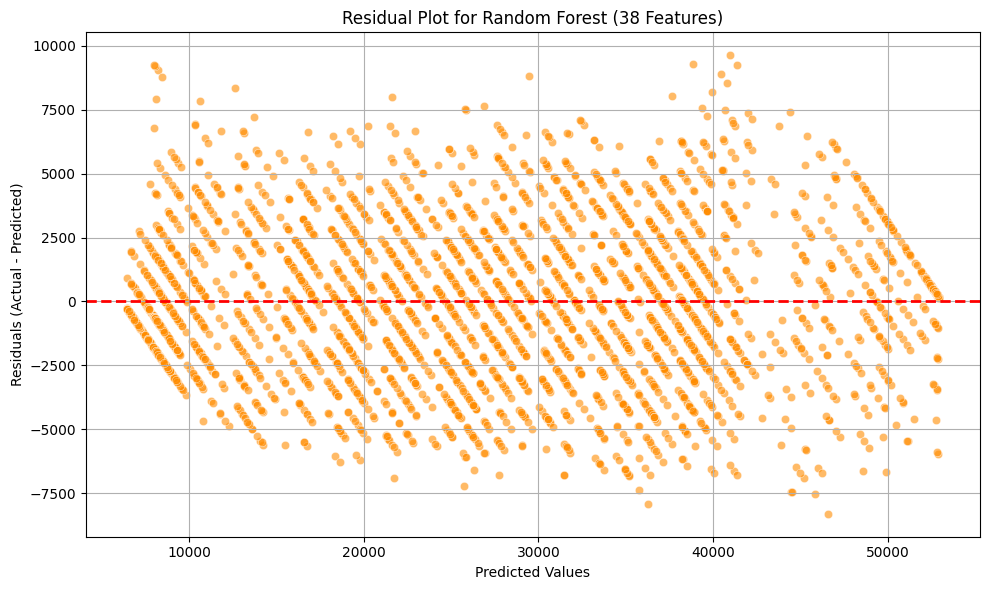

In [ ]:


# -----------------------------
# 📦 Train Random Forest on Selected Features
# -----------------------------
x_train_selected = x_train_fe[selected_features]
x_val_selected = x_val_fe[selected_features]
x_test_selected = x_test_fe[selected_features]

rf_model = RandomForestRegressor(random_state=1, n_jobs=-1)

from scipy.stats import randint, uniform

param_grid = {
    'n_estimators': randint(40,90),               # more trees, better stability
    'max_depth': randint(6, 40),                      # deeper trees for capturing more complexity
    'min_samples_split': randint(2, 15),              # prevent overfitting
    'min_samples_leaf': randint(1, 10),               # control leaf size for generalization
    'max_features': ['auto', 'sqrt', 'log2', 0.3, 0.5, 0.7]  # include float fractions as well
}


search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=100,
    scoring=rmse_scorer,
    cv=5,
    random_state=1,
    verbose=1,
    n_jobs=-1
)

start_time = time.time()
search.fit(x_train_selected, y_train)
print(f"\nRandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# --- Best Estimator ---
print("Best Parameters:", search.best_params_)
print("Best CV RMSE:", -search.best_score_)

best_rf_model = search.best_estimator_
best_rf_model.fit(x_train_selected, y_train)

# --- Evaluation ---
print("\nTraining Performance:")
train_perf = regression_performance_evaluation(best_rf_model, x_train_selected, y_train)
print(train_perf)

print("\nValidation Performance:")
val_perf = regression_performance_evaluation(best_rf_model, x_val_selected, y_val)
print(val_perf)

rmse_gap = val_perf["RMSE"][0] - train_perf["RMSE"][0]
print(f"\nRMSE Gap (Val - Train): {rmse_gap:.4f} → {'Overfitting' if rmse_gap > 500 else 'Acceptable'}")

# --- Residual Plot ---
y_pred_rf = best_rf_model.predict(x_val_selected)
residuals = y_val - y_pred_rf

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals, color='darkorange', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'Residual Plot for Random Forest ({len(selected_features)} Features)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Residual_Plot_RF_Selected_Features.jpg", dpi=300)
plt.show()

RF Model-2 with 25 features


✅ Top 25 selected features:
['weight', 'weight_squared', 'bmi', 'avg_daily_steps', 'avg_glucose_level', 'age', 'fat_percentage', 'years_of_insurance_with_us', 'covered_by_other_company_Y', 'checkup_weight_interaction', 'weight_x_checkups', 'weight_x_weight_change', 'doctor_visits_last_year', 'cholesterol_level', 'exercise', 'Alcohol', 'weight_change_last_year', 'regular_checkups_last_year', 'smoking_status_never smoked', 'Gender_Male', 'Occupation_Student', 'smoking_status_formerly smoked', 'smoking_status_smokes', 'Location_Nagpur', 'other_major_disease_history']

Fitting 5 folds for each of 100 candidates, totalling 500 fits

⏱️ RandomizedSearchCV fitting time: 873.19 seconds

📊 Training Performance:
    MAPE (%)         RMSE        R²  Adjusted R²
0  10.324542  2695.012242  0.961254     0.961199

📊 Validation Performance:
    MAPE (%)         RMSE        R²  Adjusted R²
0  11.262075  2891.054146  0.953932     0.953623

⚠️ RMSE Gap (Val - Train): 196.0419 → Acceptable


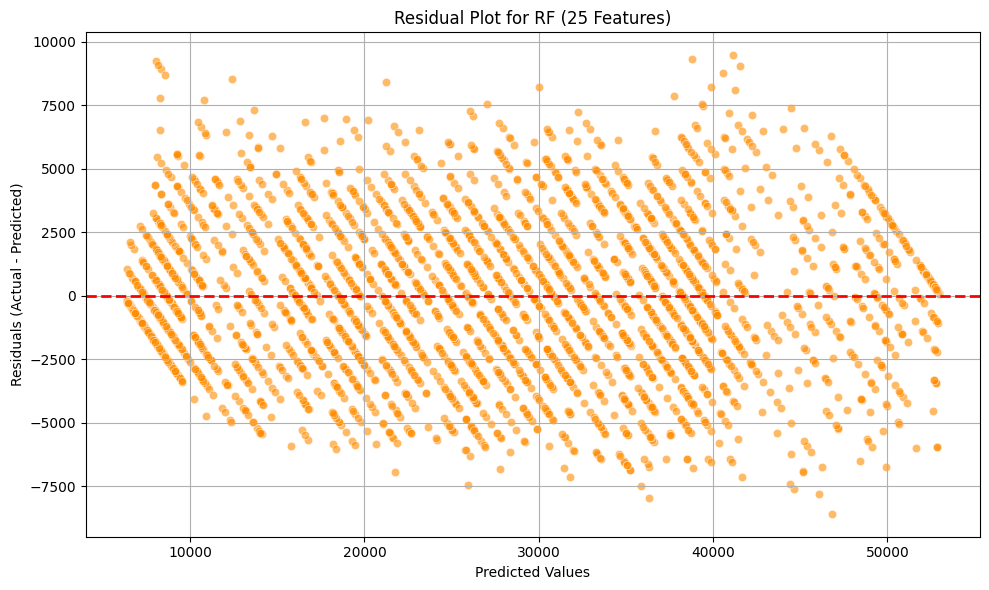

RandomForestRegressor(max_depth=9, max_features=0.5, min_samples_leaf=3,
                      n_estimators=69, n_jobs=-1, random_state=1)
['weight', 'weight_squared', 'bmi', 'avg_daily_steps', 'avg_glucose_level', 'age', 'fat_percentage', 'years_of_insurance_with_us', 'covered_by_other_company_Y', 'checkup_weight_interaction', 'weight_x_checkups', 'weight_x_weight_change', 'doctor_visits_last_year', 'cholesterol_level', 'exercise', 'Alcohol', 'weight_change_last_year', 'regular_checkups_last_year', 'smoking_status_never smoked', 'Gender_Male', 'Occupation_Student', 'smoking_status_formerly smoked', 'smoking_status_smokes', 'Location_Nagpur', 'other_major_disease_history']
    MAPE (%)         RMSE        R²  Adjusted R²
0  10.324542  2695.012242  0.961254     0.961199
    MAPE (%)         RMSE        R²  Adjusted R²
0  11.262075  2891.054146  0.953932     0.953623


In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, make_scorer
from scipy.stats import randint

# --- Custom RMSE scorer ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Performance Evaluation ---
def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })

# --- Function for RF training and evaluation with top-k features ---
def train_rf_with_top_k_features(x_train_fe, x_val_fe, x_test_fe, y_train, y_val, k_top_features):
    # Step 1: Fit base RF to get feature importances


    # Step 2: Select top-k features
    importances = pd.Series(best_rf_model.feature_importances_, index=x_train_fe.columns)
    top_k_features = importances.sort_values(ascending=False).head(k_top_features).index.tolist()

    print(f"\n✅ Top {k_top_features} selected features:\n{top_k_features}\n")

    x_train_selected = x_train_fe[top_k_features]
    x_val_selected = x_val_fe[top_k_features]
    x_test_selected = x_test_fe[top_k_features]

    # Step 3: Hyperparameter tuning
    rf_model = RandomForestRegressor(random_state=1, n_jobs=-1)
    param_grid = {
        'n_estimators': randint(40, 90),
        'max_depth': randint(6, 40),
        'min_samples_split': randint(2, 15),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['auto', 'sqrt', 'log2', 0.3, 0.5, 0.7]
    }

    search = RandomizedSearchCV(
        estimator=rf_model,
        param_distributions=param_grid,
        n_iter=100,
        scoring=rmse_scorer,
        cv=5,
        random_state=1,
        verbose=1,
        n_jobs=-1
    )

    start_time = time.time()
    search.fit(x_train_selected, y_train)
    print(f"\n⏱️ RandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

    best_rf_model = search.best_estimator_
    best_rf_model.fit(x_train_selected, y_train)

    # Step 4: Evaluation
    print("\n📊 Training Performance:")
    train_perf = regression_performance_evaluation(best_rf_model, x_train_selected, y_train)
    print(train_perf)

    print("\n📊 Validation Performance:")
    val_perf = regression_performance_evaluation(best_rf_model, x_val_selected, y_val)
    print(val_perf)

    rmse_gap = val_perf["RMSE"][0] - train_perf["RMSE"][0]
    print(f"\n⚠️ RMSE Gap (Val - Train): {rmse_gap:.4f} → {'Overfitting' if rmse_gap > 500 else 'Acceptable'}")

    # Step 5: Residual Plot
    y_pred_rf = best_rf_model.predict(x_val_selected)
    residuals = y_val - y_pred_rf

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred_rf, y=residuals, color='darkorange', alpha=0.6)
    plt.axhline(0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.title(f'Residual Plot for RF ({k_top_features} Features)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"Residual_Plot_RF_Top_{k_top_features}_Features.jpg", dpi=300)
    plt.show()

    return best_rf_model, top_k_features, train_perf, val_perf
best_rf_model, selected_features, train_result, val_result = train_rf_with_top_k_features(
x_train_fe, x_val_fe, x_test_fe, y_train, y_val, k_top_features=25)
print(best_rf_model)
print(selected_features)
print(train_result)
print(val_result)


# Linear Regression

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     8368.
Date:                Sat, 05 Jul 2025   Prob (F-statistic):               0.00
Time:                        05:57:58   Log-Likelihood:            -1.6502e+05
No. Observations:               17500   AIC:                         3.301e+05
Df Residuals:                   17458   BIC:                         3.304e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

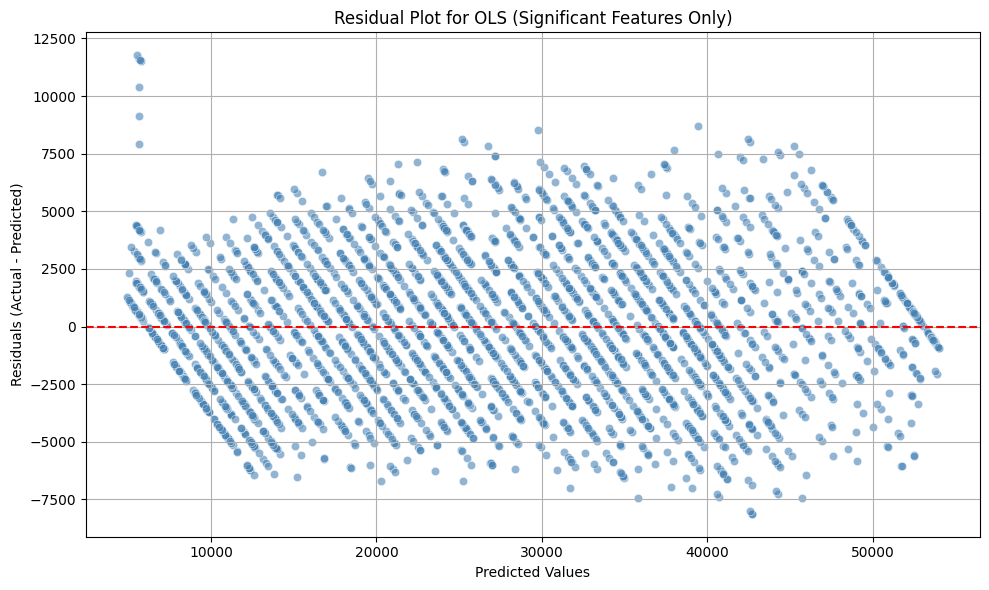

['regular_checkups_last_year', 'weight', 'weight_change_last_year', 'Location_Bangalore', 'Location_Bhubaneswar', 'Location_Chennai', 'Location_Delhi', 'Location_Guwahati', 'Location_Jaipur', 'Location_Kanpur', 'Location_Kolkata', 'Location_Lucknow', 'Location_Mumbai', 'Location_Nagpur', 'Location_Pune', 'Location_Surat', 'covered_by_other_company_Y', 'adventure_sports', 'weight_squared', 'weight_x_checkups']
    MAPE (%)         RMSE        R²  Adjusted R²
0  12.595624  3014.443244  0.951525     0.951467
    MAPE (%)         RMSE       R²  Adjusted R²
0  12.362744  2983.778461  0.95093     0.950653


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# --- RMSE Function ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# --- Performance Evaluation ---

def regression_performance_evaluation(model, predictors, target):
    pred = model.predict(predictors)
    mape = mean_absolute_percentage_error(target, pred) * 100
    rmse_val = rmse(target, pred)
    r2 = r2_score(target, pred)
    n = len(target)
    k = predictors.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    return pd.DataFrame({
        "MAPE (%)": [mape],
        "RMSE": [rmse_val],
        "R²": [r2],
        "Adjusted R²": [adj_r2]
    })
x_train_fe = x_train_df.copy()
x_val_fe = x_val_df.copy()
x_test_fe = x_test_df.copy()

for df in [x_train_fe, x_val_fe, x_test_fe]:
    df['checkup_weight_interaction'] = df['regular_checkups_last_year'] * df['weight_change_last_year']
    df['weight_squared'] = df['weight'] ** 2
    df['weight_x_checkups'] = df['weight'] * df['regular_checkups_last_year']
    df['weight_x_weight_change'] = df['weight'] * df['weight_change_last_year']
# --- OLS Linear Regression Function ---
def train_ols_with_significance_filter(x_train_fe, x_val_fe, y_train, y_val, p_thresh=0.05):
    # Add constant term for intercept
    x_train_fe = x_train_fe.reset_index(drop=True)
    x_val_fe = x_val_fe.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_val = y_val.reset_index(drop=True)

    x_train_const = sm.add_constant(x_train_fe)
    x_val_const = sm.add_constant(x_val_fe)

    # Step 1: Initial OLS model
    model = sm.OLS(y_train, x_train_const).fit()
    print(model.summary())

    # Step 2: Filter significant features
    significant_vars = model.pvalues[model.pvalues < p_thresh].index.tolist()
    removed_features = model.pvalues[model.pvalues > p_thresh].index.tolist()

    if 'const' in significant_vars:
        significant_vars.remove('const')  # exclude intercept for feature filtering

    print(f"\n✅ Significant features at p < {p_thresh}:")
    print(significant_vars)
    print(f"\n✅ Removed features at p > {p_thresh}:")
    print(removed_features)

    # Step 3: Re-train on only significant features
    x_train_sig = x_train_fe[significant_vars]
    x_val_sig = x_val_fe[significant_vars]

    x_train_sig_const = sm.add_constant(x_train_sig)
    x_val_sig_const = sm.add_constant(x_val_sig)

    final_model = sm.OLS(y_train, x_train_sig_const).fit()
    print("\n📊 Final OLS Model Summary (Significant Features Only):")
    print(final_model.summary())

    # Step 4: Predictions and Evaluation
    y_train_pred = final_model.predict(x_train_sig_const)
    y_val_pred = final_model.predict(x_val_sig_const)

    print("\n📊 Training Performance:")
    train_perf = regression_performance_evaluation(final_model, x_train_sig_const, y_train)
    print(train_perf)

    print("\n📊 Validation Performance:")
    val_perf = regression_performance_evaluation(final_model, x_val_sig_const, y_val)
    print(val_perf)

    # Step 5: Residual Plot
    residuals = y_val - y_val_pred

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_val_pred, y=residuals, color='steelblue', alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"Residual Plot for OLS (Significant Features Only)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("Residual_Plot_OLS_Significant_Features.jpg", dpi=300)
    plt.show()

    return final_model, significant_vars, train_perf, val_perf
final_model, significant_vars, train_results, val_results = train_ols_with_significance_filter(
x_train_fe, x_val_fe, y_train, y_val, p_thresh=0.05)

print(final_model)
print(significant_vars)
print(train_results)
print(val_results)
train=[]
test=[]
train.append( train_results)
test.append( val_results)

Linear Regression Model-3

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 1.715e+04
Date:                Sat, 05 Jul 2025   Prob (F-statistic):               0.00
Time:                        06:10:48   Log-Likelihood:            -1.6503e+05
No. Observations:               17500   AIC:                         3.301e+05
Df Residuals:                   17479   BIC:                         3.303e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

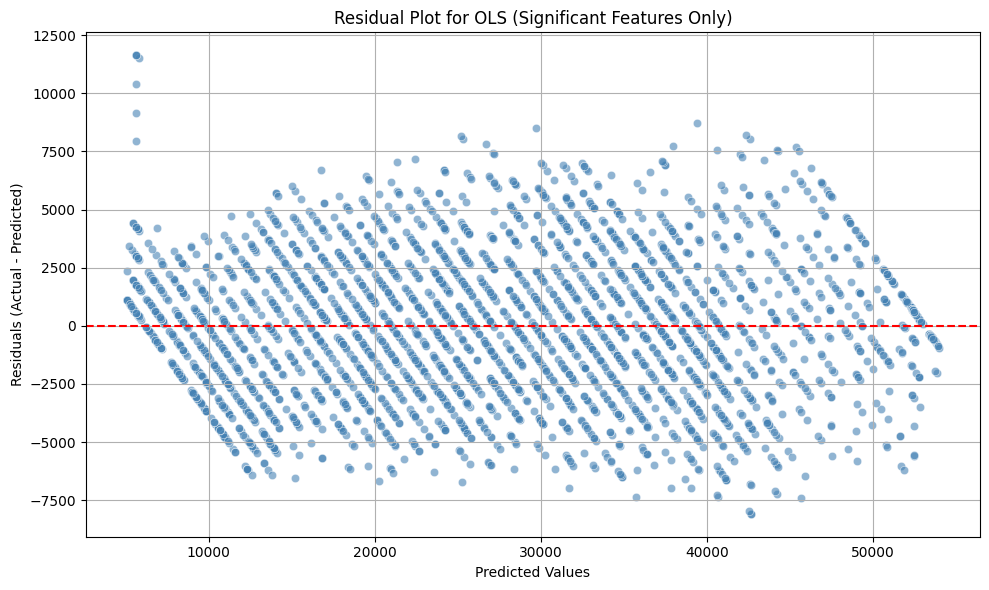

['regular_checkups_last_year', 'weight', 'weight_change_last_year', 'Location_Chennai', 'Location_Delhi', 'Location_Jaipur', 'Location_Mumbai', 'covered_by_other_company_Y', 'adventure_sports', 'weight_squared', 'weight_x_checkups']
    MAPE (%)         RMSE        R²  Adjusted R²
0  12.599696  3015.009532  0.951507     0.951474
    MAPE (%)         RMSE        R²  Adjusted R²
0  12.359008  2982.702784  0.950965     0.950808


In [ ]:
final_model, significant_vars, train_results, val_results = train_ols_with_significance_filter(
x_train_fe[significant_vars], x_val_fe[significant_vars], y_train, y_val, p_thresh=0.05)
train.append( train_results)
test.append( val_results)
print(final_model)
print(significant_vars)
print(train_results)
print(val_results)

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 3.119e+04
Date:                Sat, 05 Jul 2025   Prob (F-statistic):               0.00
Time:                        06:10:49   Log-Likelihood:            -1.6503e+05
No. Observations:               17500   AIC:                         3.301e+05
Df Residuals:                   17488   BIC:                         3.302e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

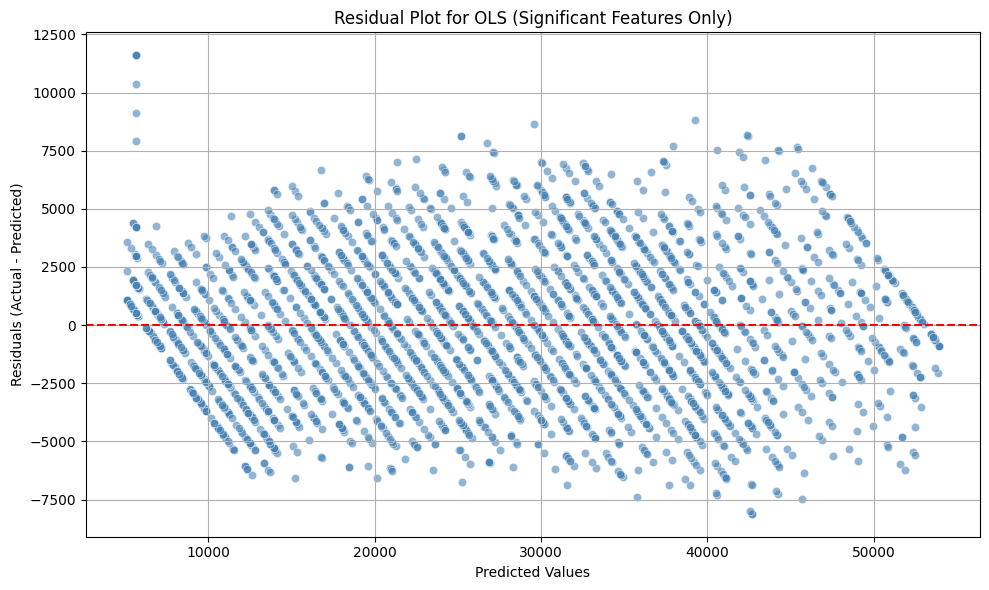

['regular_checkups_last_year', 'weight', 'weight_change_last_year', 'covered_by_other_company_Y', 'adventure_sports', 'weight_squared', 'weight_x_checkups']
    MAPE (%)         RMSE        R²  Adjusted R²
0  12.602749  3015.468656  0.951492      0.95147
    MAPE (%)         RMSE        R²  Adjusted R²
0  12.359602  2982.975364  0.950956     0.950851


In [ ]:
final_model, significant_vars, train_results, val_results = train_ols_with_significance_filter(
x_train_fe[significant_vars], x_val_fe[significant_vars], y_train, y_val, p_thresh=0.05)
train.append( train_results)
test.append( val_results)
print(final_model)
print(significant_vars)
print(train_results)
print(val_results)

In [ ]:
def generate_ols_equation(model, feature_names, round_digits=2):
    """
    Generate a readable linear regression equation from a statsmodels OLS model.

    Parameters:
        model: fitted statsmodels OLS model (e.g., sm.OLS(...).fit())
        feature_names: list of feature names used in the model
        round_digits: number of digits to round the coefficients

    Returns:
        str: Equation as a string
    """
    intercept = model.params['const']
    coefs = model.params.drop('const')

    equation = f"insurance_cost = {round(intercept, round_digits)}"

    for feature, coef in coefs.items():
        sign = " + " if coef >= 0 else " - "
        equation += f"{sign}{abs(round(coef, round_digits))}×{feature}"

    return equation

equation = generate_ols_equation(final_model, significant_vars)
print("\n📌 Final Model Equation:\n", equation)


📌 Final Model Equation:
 insurance_cost = 26039.8 - 472.78×regular_checkups_last_year + 13155.26×weight - 100.77×weight_change_last_year + 1132.66×covered_by_other_company_Y + 276.87×adventure_sports + 425.48×weight_squared - 164.25×weight_x_checkups


In [ ]:
# Combine all models' training performance
models_df = pd.concat(
    [
       x.T for x in train
    ],
    axis=1
)

# Define appropriate column names (must match the number of columns in `models_df`)
models_df.columns = [
    'LR Model-1',

    'LR Model-2',
    'LR Model-3'

]

# Display the performance comparison DataFrame
print("Model performance comparison(Train)):")
models_df



Model performance comparison(Train)):


LR Model-1   LR Model-2   LR Model-3
MAPE (%)       12.595624    12.599696    12.602749
RMSE         3014.443244  3015.009532  3015.468656
R²              0.951525     0.951507     0.951492
Adjusted R²     0.951467     0.951474     0.951470

In [ ]:
# Combine all models'test performance
models_df = pd.concat(
    [
       x.T for x in test
    ],
    axis=1
)

# Define appropriate column names (must match the number of columns in `models_df`)
models_df.columns = [
    'LR Model-1',

    'LR Model-2',
    'LR Model-3'

]

# Display the performance comparison DataFrame
print("Model performance comparison(Validation):")
models_df

Model performance comparison(Validation):


LR Model-1   LR Model-2   LR Model-3
MAPE (%)       12.362744    12.359008    12.359602
RMSE         2983.778461  2982.702784  2982.975364
R²              0.950930     0.950965     0.950956
Adjusted R²     0.950653     0.950808     0.950851

In [ ]:
x_train_df

NameError: name 'x_train_df' is not defined

In [ ]:
cat_cols

['adventure_sports',
 'Occupation',
 'cholesterol_level',
 'heart_disease_history',
 'other_major_disease_history',
 'Gender',
 'smoking_status',
 'Location',
 'covered_by_other_company',
 'Alcohol',
 'exercise']